In [ ]:
pip install numpy pandas scikit-learn matplotlib scipy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import model_evaluation_utils as meu

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import re
from nltk.corpus import stopwords


In [ ]:
import nltk
nltk.download('stopwords')
from nltk import word_tokenize
STOPWORDSS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel(r'/content/Multiclass hate detection Dataset.xlsx')

In [ ]:
df.tail()

,Label,Text
27437,Normal,"John, This guy has been trying to get in touch..."
27438,Normal,October 2001 Vol. 53 [IMAGE] [IMAGE] [IMAGE] [...
27439,Normal,The report named: NG - PROPT P/L published as ...
27440,Normal,Here is the EOL information Dutch -----Origina...
27441,Normal,The report named: NG - Price P/L published as ...


In [ ]:
df['Text'].isnull().sum()

21

In [ ]:
df=df.dropna() # deleting the empty not available columns
print(df.dropna().index)


Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       27432, 27433, 27434, 27435, 27436, 27437, 27438, 27439, 27440, 27441],
      dtype='int64', length=27421)


In [ ]:
df.tail()

,Label,Text
27437,Normal,"John, This guy has been trying to get in touch..."
27438,Normal,October 2001 Vol. 53 [IMAGE] [IMAGE] [IMAGE] [...
27439,Normal,The report named: NG - PROPT P/L published as ...
27440,Normal,Here is the EOL information Dutch -----Origina...
27441,Normal,The report named: NG - Price P/L published as ...


In [ ]:
df.isnull().sum()
print(df.head())

,0
Label,0
Text,0


       Label                                               Text
0  Offensive  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
1  Offensive  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
2  Offensive  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
3  Offensive  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
4  Offensive  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...


In [ ]:
#df=df[~df["Text"].str.contains(r'[0-9]', na=False)]
len(df)

27421

In [ ]:
df.Text

,Text
0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
2,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
3,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
4,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
...,...
27437,"John, This guy has been trying to get in touch..."
27438,October 2001 Vol. 53 [IMAGE] [IMAGE] [IMAGE] [...
27439,The report named: NG - PROPT P/L published as ...
27440,Here is the EOL information Dutch -----Origina...


In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

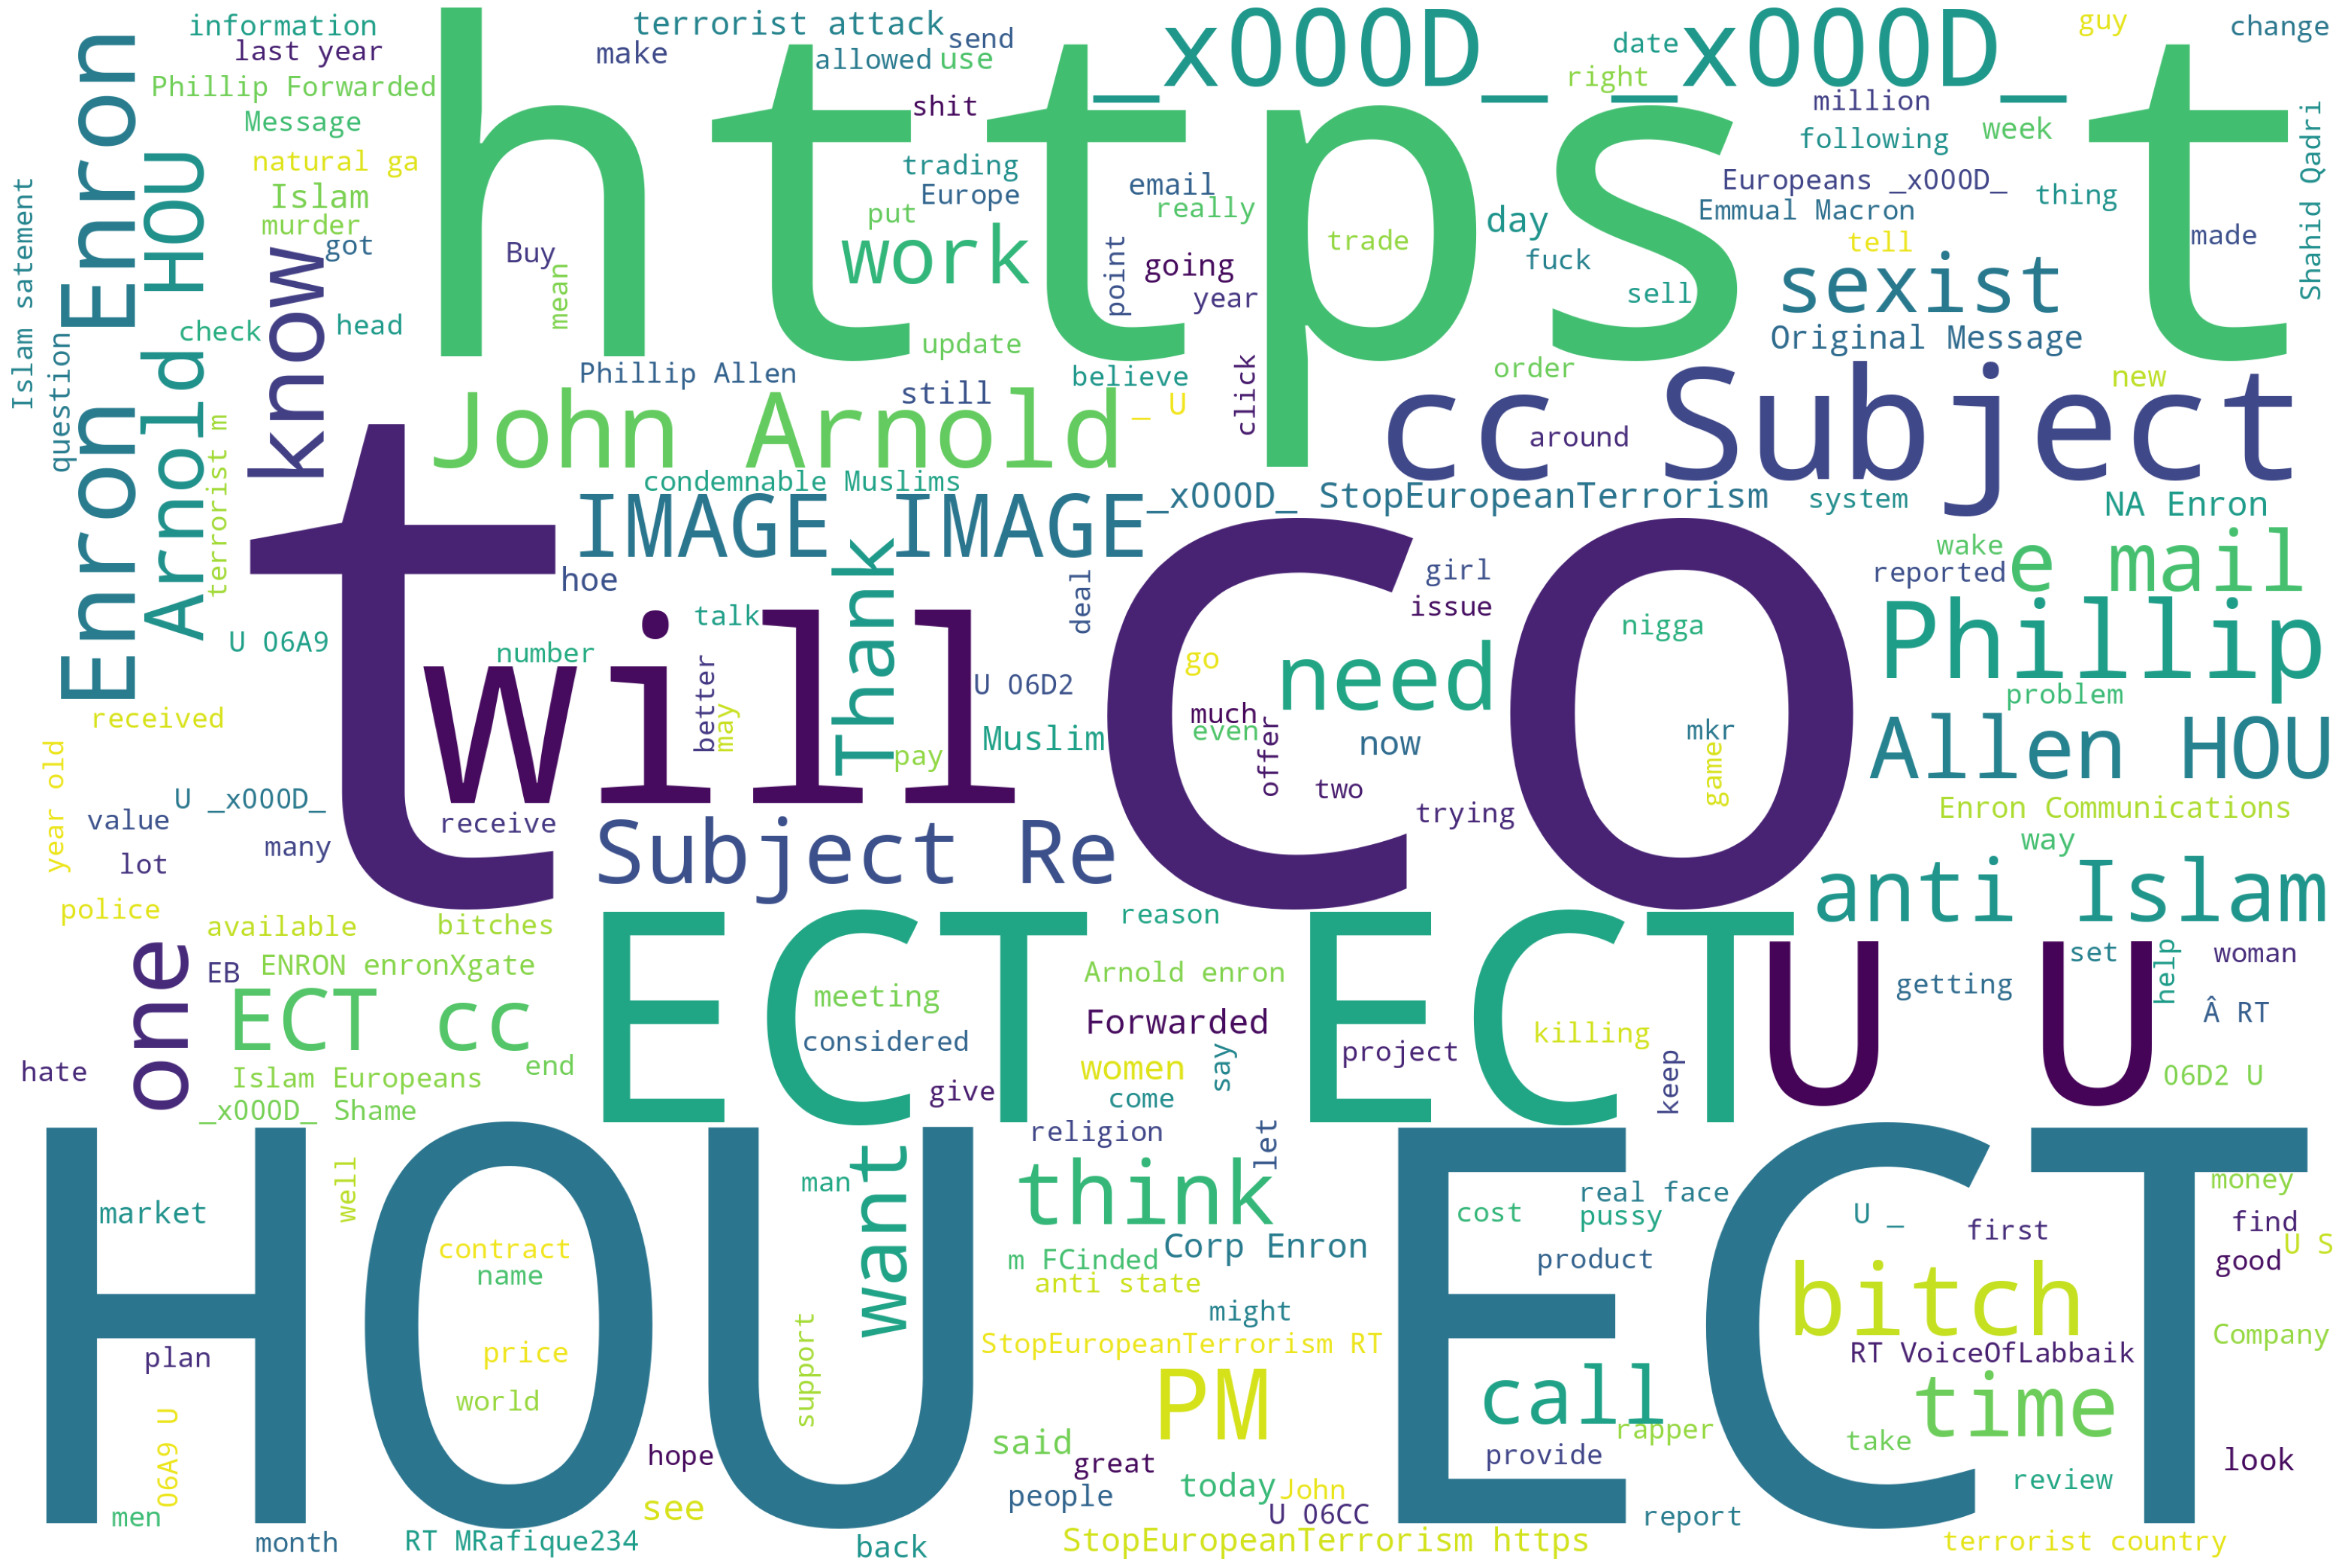

In [ ]:
# Import package
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white').generate(' '.join(df.Text.astype("str")))
# Plot
plot_cloud(wordcloud)


<BarContainer object of 6 artists>

Text(0.5, 1.0, 'Class Frequency')

Text(0.5, 0, 'Classes')

Text(0, 0.5, 'Frequency')

<Axes: title={'center': 'Class Frequency'}, xlabel='Label', ylabel='Frequency'>

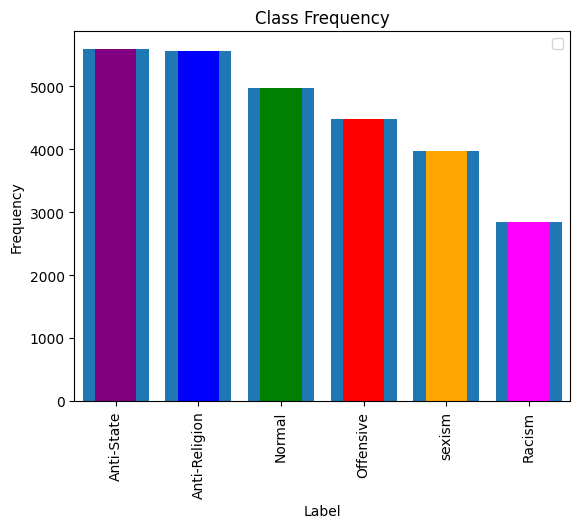

In [ ]:
fig, ax = plt.subplots()
# count the occurrence of each class
data = df['Label'].value_counts()
# get x and y data
points = data.index
frequency = data.values
# create bar chart
ax.bar(points, frequency)
# set title and labels
ax.set_title('Class Frequency')
ax.set_xlabel('Classes')
ax.set_ylabel('Frequency')
ax.legend()

df['Label'].value_counts().plot.bar(color=['purple', 'blue', 'green', 'red', 'orange', 'magenta'])

plt.savefig("barchart_class.png", dpi=700, bbox_inches="tight")


In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)
df = shuffle(df)
df = shuffle(df)
df = shuffle(df)

In [ ]:
df['Text'].head()

,Text
3899,@XXXratedLIPSS I always want to speak to ppl I...
8069,RT @sports2inflatio: #AdviceForYoungFeminists ...
23080,"Susan, I received an enrollment confirmation f..."
16102,RT @SAyedMustafaKa4: Now what will you called ...
19834,Armed Anti-Lockdown Protesters Just Tried to S...


In [ ]:
df.Label.value_counts()

,count
Label,
Anti-State,5591
Anti-Religion,5565
Normal,4979
Offensive,4476
sexism,3972
Racism,2838


In [ ]:
import cufflinks as cf
import plotly.express as px
cf.go_offline()  # To enable offline plotting


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()


In [ ]:
df.Label.value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of tweets',
                                                                title='Number of tweets in each category')

In [ ]:
df.Label.head()

,Label
3899,Offensive
8069,sexism
23080,Normal
16102,Anti-Religion
19834,Anti-State


In [ ]:
pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 6.6 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#text preprocessing

import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
from nltk.corpus import stopwords
import emoji
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

# Function to remove the stopwords
nltk.download('stopwords')


df = df.reset_index(drop=True)
# pre-processing code
def clean_text(text,replace=''):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    text = emoji.demojize(str(text))
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation characters
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"http\S+", "", text)  # removes URL from string
    text = text.replace('rt', '').replace('pm', '').replace('xd', '').replace('subject', '').replace('phillip', '')

    text = ' '.join(filter(lambda x: lemmatizer.lemmatize(x, pos ="a") not in stop_words, text.split()))
    text = " ".join(re.split("\s+", text, flags=re.UNICODE))
    return text

# apply pre-processing on sentences
df['Text'] = df['Text'].apply(clean_text)
df['Text'] = df['Text'].replace('', np.nan)
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['Text'].head()

,Text
0,xxxratedlipss always want speak ppl converse t...
1,sposinflatio adviceforyoungfeminists isis kill...
2,susan received enrollment confirmation class s...
3,sayedmustafaka called bc u chance blame muslim...
4,armed antilockdown protesters tried storm oreg...


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
nltk.data.find('tokenizers/punkt_tab/english')


FileSystemPathPointer('/root/nltk_data/tokenizers/punkt_tab/english')

<Figure size 2000x1000 with 0 Axes>

(-0.5, 999.5, 499.5, -0.5)

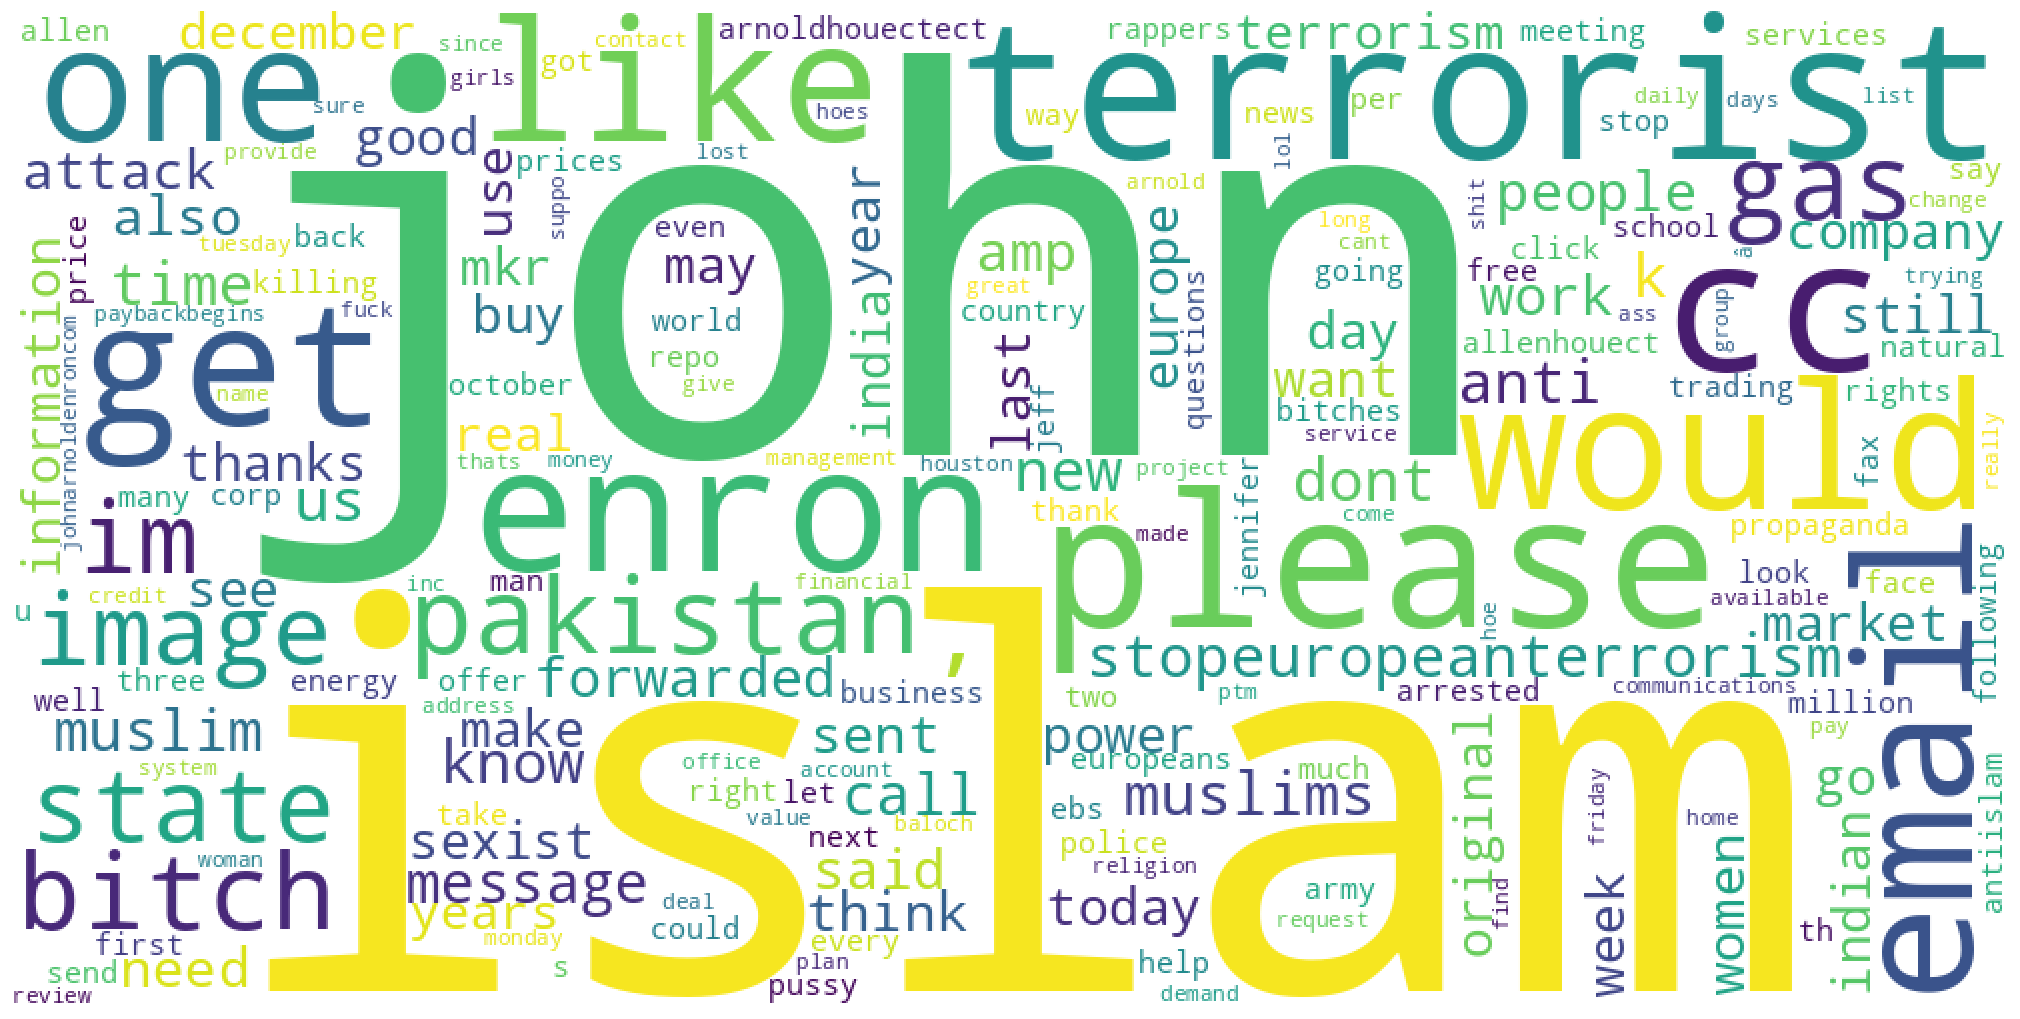

In [ ]:
# Import package
from wordcloud import WordCloud
sentences = ' '.join(df["Text"])
tokens = word_tokenize(sentences)
vocabulary = set(tokens)
frequency_dist = nltk.FreqDist(tokens)

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(frequency_dist)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.savefig("pre-processd_data.png", dpi=700)
plt.show()


In [ ]:
#LSTM Modeling
#Vectorize consumer complaints text, by turning each text into either a sequence of integers or into a vector.
#Limit the data set to the top 5,0000 words.
#Set the max number of words in each complaint at 250.

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each TWEET.
MAX_SEQUENCE_LENGTH = 170
# This is fixed.
EMBEDDING_DIM = 170
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 45962 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (27406, 170)


In [ ]:
#Converting categorical labels to numbers.
#Offensive= '3'
#Anti-State= '1'
#Anti-Religion= '0'
#Normal='2'
#Racism= '4'
#sexism='5'

Y = pd.get_dummies(df['Label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (27406, 6)


In [ ]:
#Train test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(19184, 170) (19184, 6)
(8222, 170) (8222, 6)


In [ ]:
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dense(units=128, activation="relu",kernel_regularizer=regularizers.l2(0.00000001)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(units=64, activation="relu"))#,recurrent_dropout=0.15
model.add(Dense(units=28, activation="relu",kernel_regularizer=regularizers.l2(0.00000001)))#,
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 200
batch_size = 256

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.10)#,callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001])

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



 8/68 ━━━━━━━━━━━━━━━━━━━━ 2:49 3s/step - accuracy: 0.2143 - loss: 1.7839

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-44-91bbef84bda3>", line 15, in <cell line: 15>
    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.10)#,callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001])
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit
    logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.p

TypeError: object of type 'NoneType' has no len()

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 170, 170)            │       8,500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 170, 128)            │          21,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 170, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 28)                  │           1,820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             174 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,385,920 (100.65 MB)

 Trainable params: 8,795,306 (33.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,590,614 (67.10 MB)

In [ ]:
accr_model = model.evaluate(X_test,Y_test)
#save keras model
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_model[0],accr_model[1]))

257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9469 - loss: 0.3542
Test set
  Loss: 0.362
  Accuracy: 0.947


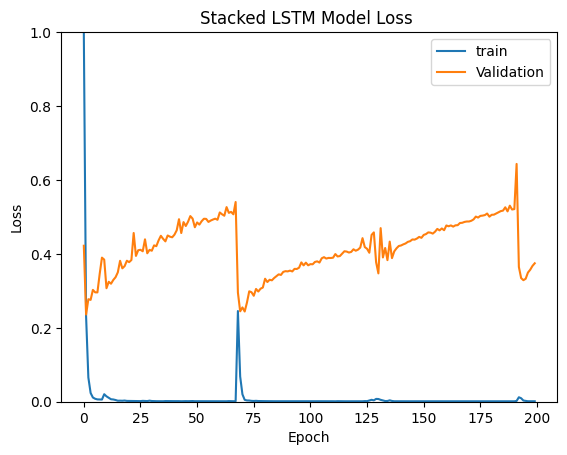

In [ ]:
import matplotlib.pyplot as plt
plt.title('Stacked LSTM Model Loss ')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.ylim(0,1)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('Loss.png', dpi=300, bbox_inches='tight')
plt.show();

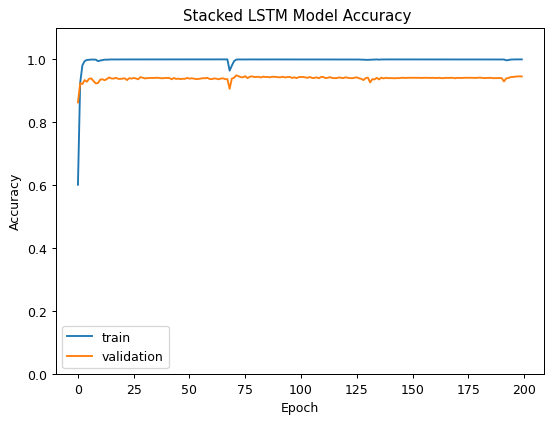

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5), dpi=90)
plt.title('Stacked LSTM Model Accuracy ')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.ylim(0,1.1)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig("Accuracy.png", dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
#different models for the implementation of the lstms versions
# 3 LSTM layers model
model_1 = Sequential()
model_1.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, trainable=True, input_length = X.shape[1])) #input_length=X.shape[1] replace with the input shape, X_train.shape[1] in place of X.shape
model_1.add(LSTM(units=128, return_sequences=False))
model_1.add(Dense(16))
#model_1.add(Dropout(rate=0.25))
model_1.add(Dense(6, activation='softmax'))
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1.summary()

epochs = 20
batch_size = 64

history_1 = model_1.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.10,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.6873 - loss: 0.8814 - val_accuracy: 0.9510 - val_loss: 0.1459
Epoch 2/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9850 - loss: 0.0540 - val_accuracy: 0.9562 - val_loss: 0.1434
Epoch 3/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9988 - loss: 0.0100 - val_accuracy: 0.9583 - val_loss: 0.1441
Epoch 4/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9995 - loss: 0.0041 - val_accuracy: 0.9651 - val_loss: 0.1451
Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9989 - loss: 0.0043 - val_accuracy: 0.9620 - val_loss: 0.1532


In [ ]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 170, 170)            │       8,500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │         153,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,965,764 (99.05 MB)

 Trainable params: 8,655,254 (33.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,310,510 (66.03 MB)

In [ ]:
accr_model_1 = model_1.evaluate(X_test,Y_test)
#save keras model
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_model_1[0],accr_model_1[1]))

257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9547 - loss: 0.1803
Test set
  Loss: 0.181
  Accuracy: 0.955


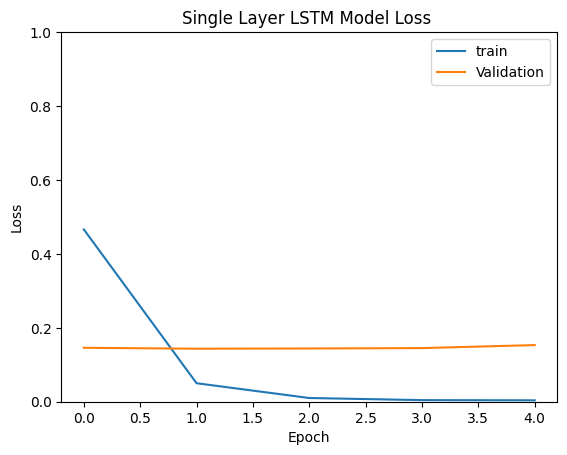

In [ ]:
import matplotlib.pyplot as plt
plt.title('Single Layer LSTM Model Loss ')
plt.plot(history_1.history['loss'], label='train')
plt.plot(history_1.history['val_loss'], label='Validation')
plt.legend()
plt.ylim(0,1)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('Loss1.png', dpi=300, bbox_inches='tight')
plt.show();

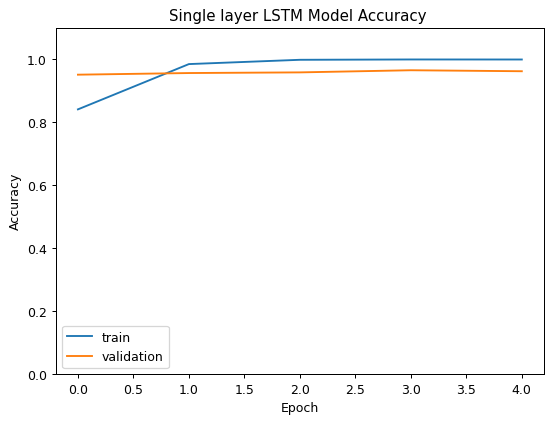

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5), dpi=90)
plt.title('Single layer LSTM Model Accuracy ')
plt.plot(history_1.history['accuracy'], label='train')
plt.plot(history_1.history['val_accuracy'], label='validation')
plt.legend()
plt.ylim(0,1.1)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig("Accuracy.png", dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
# LSTM with Conv1D layer
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Activation
model_2 = Sequential()
model_2.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, trainable=True, input_length = X.shape[1]))
model_2.add(Conv1D(filters=32, kernel_size=3, padding='same'))
model_2.add(MaxPooling1D(pool_size=2))
model_2.add(LSTM(units=64, return_sequences=True, dropout=0.2, recurrent_dropout=0.15))
model_2.add(Dense(16))
model_2.add(Activation('relu'))
model_2.add(LSTM(units=64, return_sequences=True, dropout=0.2, recurrent_dropout=0.15))
model_2.add(Dense(16))
model_2.add(Activation('relu'))
model_2.add(LSTM(units=64, return_sequences=False, dropout=0.2, recurrent_dropout=0.15))
model_2.add(Dense(16))
model_2.add(Activation('relu'))
model_2.add(Dropout(rate=0.25))
model_2.add(Dense(6, activation='softmax'))
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.1)
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# optimizer='adam'
model_2.summary()


epochs = 20
batch_size = 256

history_2 = model_2.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.10)
                        #callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 44s 496ms/step - accuracy: 0.2291 - loss: 1.7459 - val_accuracy: 0.3434 - val_loss: 1.5685
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 35s 461ms/step - accuracy: 0.3643 - loss: 1.4476 - val_accuracy: 0.4695 - val_loss: 1.0762
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 41s 458ms/step - accuracy: 0.5234 - loss: 1.0743 - val_accuracy: 0.7405 - val_loss: 0.7423
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 31s 452ms/step - accuracy: 0.7005 - loss: 0.7447 - val_accuracy: 0.7983 - val_loss: 0.6015
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 41s 457ms/step - accuracy: 0.7962 - loss: 0.5407 - val_accuracy: 0.8369 - val_loss: 0.5465
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 41s 454ms/step - accuracy: 0.8691 - loss: 0.3871 - val_accuracy: 0.8530 - val_loss: 0.5316
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 41s 455ms/step - accuracy: 0.9122 - loss: 0.2875 - val_accuracy: 0.8635 - val_loss: 0.5266
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 44s 496ms/step - accuracy: 0.9298 - loss: 0.2302 - val_accu

In [ ]:
model_2.summary();

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 170, 170)            │       8,500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 170, 32)             │          16,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 85, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 85, 64)              │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 85, 16)              │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 85, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 85, 64)              │          20,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 85, 16)              │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 85, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 64)                  │          20,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 6)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,757,636 (98.26 MB)

 Trainable params: 8,585,878 (32.75 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,171,758 (65.51 MB)

In [ ]:
accr_model_2 = model_2.evaluate(X_test,Y_test)
#save keras model
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_model_2[0],accr_model_2[1]))

257/257 ━━━━━━━━━━━━━━━━━━━━ 36s 141ms/step - accuracy: 0.8970 - loss: 0.7547
Test set
  Loss: 0.730
  Accuracy: 0.897


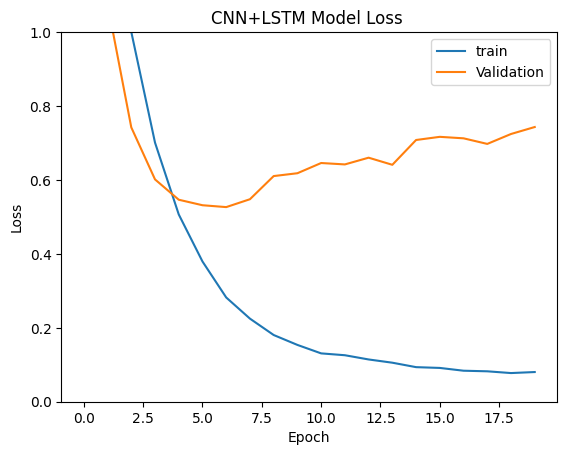

In [ ]:
import matplotlib.pyplot as plt
plt.title('CNN+LSTM Model Loss ')
plt.plot(history_2.history['loss'], label='train')
plt.plot(history_2.history['val_loss'], label='Validation')
plt.legend()
plt.ylim(0,1)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('Loss.png', dpi=300, bbox_inches='tight')
plt.show();

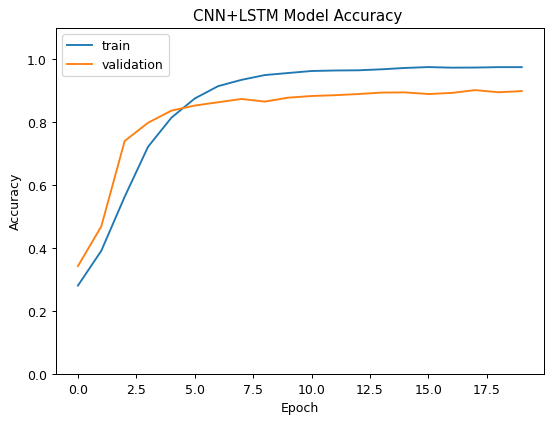

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5), dpi=90)
plt.title('CNN+LSTM Model Accuracy ')
plt.plot(history_2.history['accuracy'], label='train')
plt.plot(history_2.history['val_accuracy'], label='validation')
plt.legend()
plt.ylim(0,1.1)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig("Accuracy.png", dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
# LSTM with GRU layer
from keras.layers import GRU

model_3 = Sequential()
model_3.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, trainable=True, input_length = X_train.shape[1]))
model_3.add(Dropout(rate=0.15))
model_3.add(LSTM(64, return_sequences=True, dropout=0.2, name="LSTM"))
model_3.add(GRU(64, return_sequences=False, dropout=0.2, name="GRU"))
model_3.add(Dense(64, name="Dense2"))
model_3.add(Dropout(rate=0.15))
model_3.add(Dense(16, name="Dense3"))
model_3.add(Dense(6, activation='softmax', name="Output"))
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3.summary()

epochs = 20
batch_size = 64

history_3 = model_3.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.10)
                        #callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ LSTM (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ GRU (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense3 (Dense)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 173s 608ms/step - accuracy: 0.6356 - loss: 0.9353 - val_accuracy: 0.9458 - val_loss: 0.1678
Epoch 2/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 204s 618ms/step - accuracy: 0.9787 - loss: 0.0657 - val_accuracy: 0.9442 - val_loss: 0.1830
Epoch 3/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 174s 645ms/step - accuracy: 0.9961 - loss: 0.0158 - val_accuracy: 0.9489 - val_loss: 0.2039
Epoch 4/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 169s 628ms/step - accuracy: 0.9987 - loss: 0.0077 - val_accuracy: 0.9437 - val_loss: 0.2204
Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 167s 619ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9468 - val_loss: 0.2563
Epoch 6/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 206s 633ms/step - accuracy: 0.9985 - loss: 0.0062 - val_accuracy: 0.9479 - val_loss: 0.2466
Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 205s 646ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9510 - val_loss: 0.2487
Epoch 8/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 192s 610ms/step - accuracy: 0.9985 -

In [ ]:
model_3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 170, 170)            │       8,500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 170, 170)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ LSTM (LSTM)                          │ (None, 170, 64)             │          60,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ GRU (GRU)                            │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense3 (Dense)                       │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 6)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,771,268 (98.31 MB)

 Trainable params: 8,590,422 (32.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,180,846 (65.54 MB)

In [ ]:
accr_model_3 = model_3.evaluate(X_test,Y_test)
#save keras model
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_model_3[0],accr_model_3[1]))

257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9489 - loss: 0.2594
Test set
  Loss: 0.274
  Accuracy: 0.949


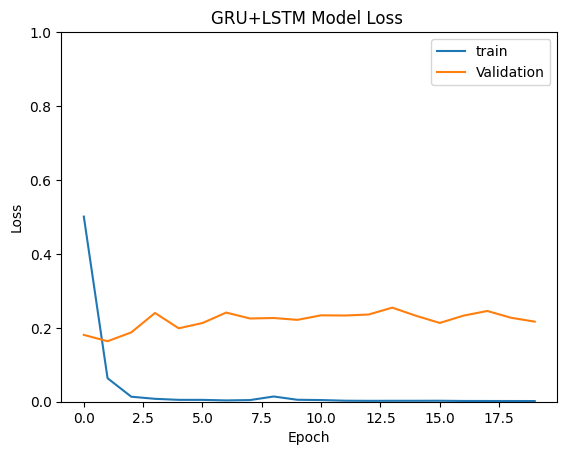

In [ ]:
import matplotlib.pyplot as plt
plt.title('GRU+LSTM Model Loss ')
plt.plot(history_3.history['loss'], label='train')
plt.plot(history_3.history['val_loss'], label='Validation')
plt.legend()
plt.ylim(0,1)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('Loss.png', dpi=300, bbox_inches='tight')
plt.show();

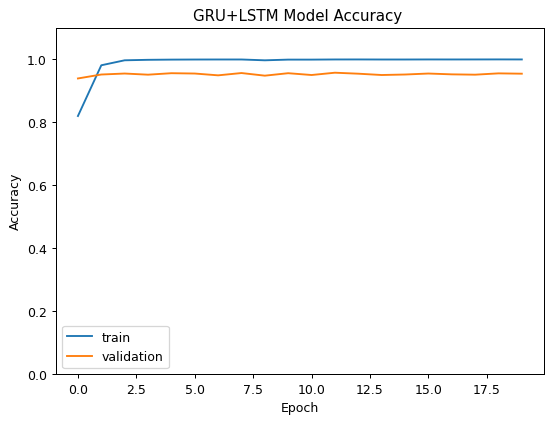

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5), dpi=90)
plt.title('GRU+LSTM Model Accuracy ')
plt.plot(history_3.history['accuracy'], label='train')
plt.plot(history_3.history['val_accuracy'], label='validation')
plt.legend()
plt.ylim(0,1.1)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig("Accuracy.png", dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import ModelCheckpoint
top_words = 100000

x_train,x_cv,y_train,y_cv = train_test_split(X_train,Y_train,test_size = 0.2)
print("Shape of train data:", X_train.shape)
print("Shape of Test data:", X_test.shape)
print("Shape of CV data:", x_cv.shape)

# truncate and pad input sequences
max_review_length = 150
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
x_cv = sequence.pad_sequences(x_cv,maxlen=max_review_length)

Shape of train data: (19184, 170)
Shape of Test data: (8222, 170)
Shape of CV data: (3837, 170)


In [ ]:
embedding_vecor_length = 100
model4 = Sequential()
model4.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model4.add(SpatialDropout1D(0.2))
model4.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model4.add(Dense(6, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model4.summary())
filepath="weights_best.weights.h5"
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, mode='max', verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min',save_weights_only=True)
callbacks_list = [early_stop,checkpoint]
model4.fit(x_train, y_train, epochs=20, batch_size=256,verbose = 1,callbacks = callbacks_list,validation_data=(x_cv,y_cv))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.4137 - loss: 1.5653
Epoch 1: val_loss improved from inf to 0.52687, saving model to weights_best.weights.h5
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 327ms/step - accuracy: 0.4162 - loss: 1.5599 - val_accuracy: 0.8426 - val_loss: 0.5269
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.8771 - loss: 0.4180
Epoch 2: val_loss improved from 0.52687 to 0.20891, saving model to weights_best.weights.h5
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 360ms/step - accuracy: 0.8774 - loss: 0.4166 - val_accuracy: 0.9315 - val_loss: 0.2089
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.9594 - loss: 0.1398
Epoch 3: val_loss improved from 0.20891 to 0.15382, saving model to weights_best.weights.h5
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 361ms/step - accuracy: 0.9595 - loss: 0.1396 - val_accuracy: 0.9484 - val_loss: 0.1538
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.9850 - loss: 0.0661
Epoch 4: val_loss improve

In [ ]:
# Train the model first
embedding_vecor_length = 100
model4 = Sequential()
model4.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model4.add(SpatialDropout1D(0.2))
model4.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model4.add(Dense(6, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define callbacks
checkpoint_path = "weights_best.weights.h5"
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=True
)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, mode='max', verbose=1)
callbacks_list = [early_stop, checkpoint]

# Train the model
history = model4.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=256,
    verbose=1,
    callbacks=callbacks_list,
    validation_data=(x_cv, y_cv)
)

# Then evaluate
scores = model4.evaluate(X_test, Y_test, verbose=1, batch_size=256)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss: %.2f%%" % (scores[0]))

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.4418 - loss: 1.5323
Epoch 1: val_loss improved from inf to 0.53897, saving model to weights_best.weights.h5
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 335ms/step - accuracy: 0.4441 - loss: 1.5266 - val_accuracy: 0.8275 - val_loss: 0.5390
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.8632 - loss: 0.4365
Epoch 2: val_loss improved from 0.53897 to 0.20799, saving model to weights_best.weights.h5
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 326ms/step - accuracy: 0.8636 - loss: 0.4351 - val_accuracy: 0.9338 - val_loss: 0.2080
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.9592 - loss: 0.1435
Epoch 3: val_loss improved from 0.20799 to 0.16315, saving model to weights_best.weights.h5
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 373ms/step - accuracy: 0.9592 - loss: 0.1432 - val_accuracy: 0.9487 - val_loss: 0.1632
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.9858 - loss: 0.0617
Epoch 4: val_loss improved fro

In [ ]:
# Save weights
model4.save_weights('weights_best.weights.h5')

# Later load and evaluate
model4 = Sequential()
model4.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model4.add(SpatialDropout1D(0.2))
model4.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model4.add(Dense(6, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Load weights
model4.load_weights('weights_best.weights.h5')

# Evaluate
scores = model4.evaluate(X_test, Y_test, verbose=1, batch_size=256)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss: %.2f%%" % (scores[0]))

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.1988 - loss: 1.7907
Accuracy: 19.93%
Loss: 1.79%


In [ ]:
# Final evaluation of the model
embedding_vecor_length = 100
model4 = Sequential()
model4.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model4.add(SpatialDropout1D(0.2))
model4.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model4.add(Dense(6, activation='softmax'))
model4.load_weights("weights_best.weights.h5")
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
scores = model4.evaluate(X_test,  Y_test, verbose=1,batch_size = 256)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss: %.2f%%" % (scores[0]))

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.1684 - loss: 1.7918
Accuracy: 17.40%
Loss: 1.79%


# Saving  Best Model

In [ ]:
model_json = model.to_json()
with open("/content/model_01-01-21-updated.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/model_01-01-21-updated..weights.h5")
print("Saved model to disk")

7206

Saved model to disk


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv1D,MaxPooling1D
from tensorflow.keras.layers import LSTM,Dropout
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import ModelCheckpoint
x_train,x_cv,y_train,y_cv = train_test_split(X,Y,test_size = 0.3)
embedding_vecor_length = 32
model5 = Sequential()
model5.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model5.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model5.add(MaxPooling1D(pool_size=2))
model5.add(GRU(64, return_sequences=True, dropout=0.2, name="GRU"))
model5.add(LSTM(100))
model5.add(Dense(6, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model5.summary())
filepath="weights_best_cnn.weights.h5"
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, mode='min', verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss' ,verbose=1, save_best_only=True, mode='min',save_weights_only=True)
callbacks_list = [early_stop,checkpoint]
history_5=model5.fit(x_train, y_train, epochs=200, batch_size=256,verbose = 1,callbacks = callbacks_list,validation_data=(x_cv,y_cv))

NameError: name 'top_words' is not defined

In [ ]:
# Final evaluation of the model
# create the model
# embedding_vecor_length = 32
# model5 = Sequential()
# model5.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
# model5.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model5.add(MaxPooling1D(pool_size=2))
# model5.add(LSTM(100))
# model5.add(Dense(6, activation='softmax'))
# model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model5.summary())
# model5.load_weights("/content/weights_best.hdf5")
scores = model5.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss: %.2f%%" % (scores[0]))

Accuracy: 98.10%
Loss: 0.09%


In [ ]:
model5.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)             │ (None, 170, 32)             │       3,200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 170, 32)             │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 85, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ GRU (GRU)                            │ (None, 85, 64)              │          18,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 100)                 │          66,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 6)                   │             606 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,865,580 (37.63 MB)

 Trainable params: 3,288,526 (12.54 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,577,054 (25.09 MB)

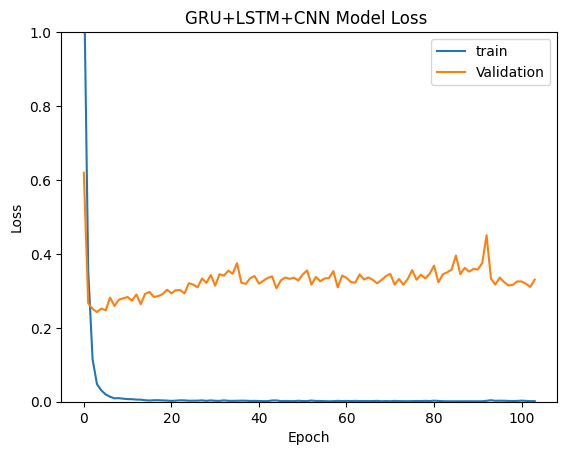

In [ ]:
import matplotlib.pyplot as plt
plt.title('GRU+LSTM+CNN Model Loss ')
plt.plot(history_5.history['loss'], label='train')
plt.plot(history_5.history['val_loss'], label='Validation')
plt.legend()
plt.ylim(0,1)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('Loss.png', dpi=300, bbox_inches='tight')
plt.show();

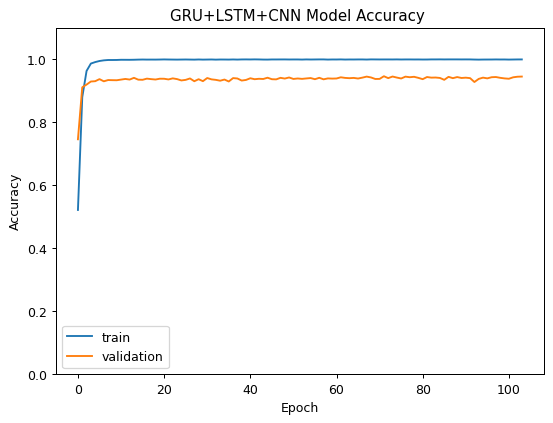

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5), dpi=90)
plt.title('GRU+LSTM+CNN Model Accuracy ')
plt.plot(history_5.history['accuracy'], label='train')
plt.plot(history_5.history['val_accuracy'], label='validation')
plt.legend()
plt.ylim(0,1.1)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig("Accuracy.png", dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
new_complaint = ['Special Assistant to the Prime Minister on National Health Services, Regulations & Coordination; Infectious Diseases Physician']
# new_complaint = ['']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=max_review_length)
pred = model5.predict(padded)
labels = ["Anti-Religion","Anti-State", "Normal", "Offensive", "Racism", "sexism"]
#Offensive= '3'
#Anti-State= '1'
#Anti-Religion= '0'
#Normal='2'
#Racism= '4'
#sexism='5'
#print(pred, labels[np.argmax(pred)])
print(labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Offensive


In [ ]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['Model', 'Accuracy']
table.add_row(['LSTM', 93.99])
table.add_row(['CNN using LSTM', 94.32])
print(table)

+----------------+----------+
|     Model      | Accuracy |
+----------------+----------+
|      LSTM      |  93.99   |
| CNN using LSTM |  94.32   |
+----------------+----------+


In [ ]:
accr = model5.evaluate(X_test,Y_test)
#save keras model
model.save("English_hate_detection.h5")
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9777 - loss: 0.1175


Test set
  Loss: 0.090
  Accuracy: 0.982


In [ ]:
new_complaint = ['']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['0', '1', '2', '3','4', '5']
#print(pred, labels[np.argmax(pred)])
print(labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
2


Text(0.5, 1.0, 'LSTM+GRU Model Accuracy')

<Figure size 630x450 with 0 Axes>

(0.0, 20.0)

(0.0, 1.0)

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

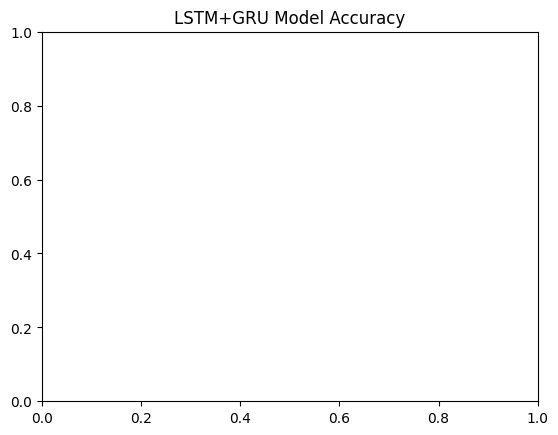

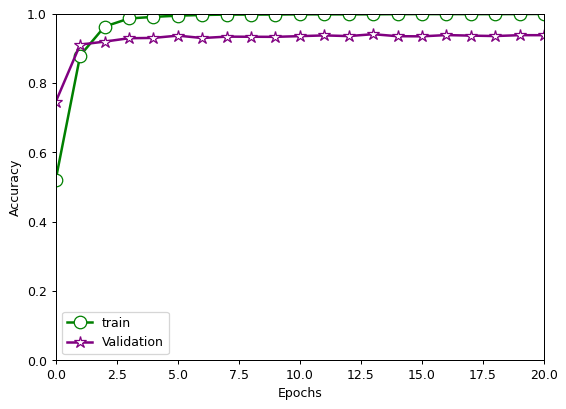

In [ ]:
plt.title('LSTM+GRU Model Accuracy')
plt.figure(figsize=(7, 5), dpi=90)
plt.plot(history_5.history['accuracy'], label='train',marker='o', markerfacecolor='white', markersize=10, color='green', linewidth=2)
plt.plot(history_5.history['val_accuracy'], label='Validation',marker='*', markerfacecolor='white', markersize=10, color='purple', linewidth=2)

axes = plt.gca()
axes.set_xlim([0,20])
axes.set_ylim([0,1])
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.savefig("Accuracy_lstmgrucheck.png", dpi=90)
plt.show()

Text(0.5, 1.0, 'LSTM+GRU Model Loss')

(0.0, 20.0)

(0.0, 1.0)

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

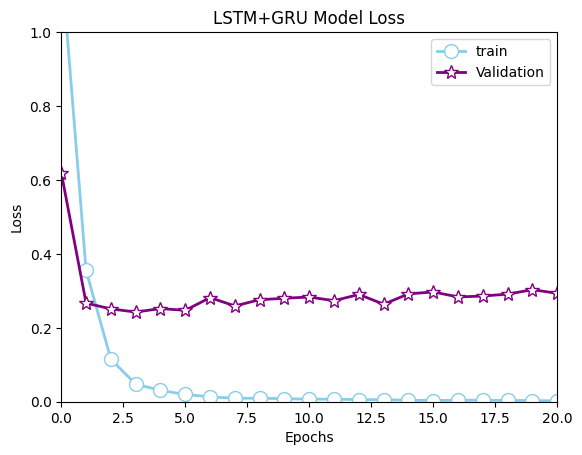

In [ ]:
plt.title('LSTM+GRU Model Loss')
plt.plot(history_5.history['loss'], label='train',marker='o', markerfacecolor='white', markersize=10, color='skyblue', linewidth=2)
plt.plot(history_5.history['val_loss'], label='Validation',marker='*', markerfacecolor='white', markersize=10, color='purple', linewidth=2)
axes = plt.gca()
axes.set_xlim([0,20])
axes.set_ylim([0,1])
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("Loss_lstmgrucheckpoints.png")
plt.show()

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/LSTM_GRU_Model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/model_01-01-21-updated.weights.h5")
print("Saved model to disk")

6757

Saved model to disk


Epoch 1/200
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9997 - loss: 9.3744e-04
Epoch 1: val_loss did not improve from 0.24262
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9997 - loss: 9.5605e-04 - val_accuracy: 0.9409 - val_loss: 0.3381
Epoch 2/200
72/75 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9989 - loss: 0.0023
Epoch 2: val_loss did not improve from 0.24262
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9989 - loss: 0.0023 - val_accuracy: 0.9388 - val_loss: 0.3390
Epoch 3/200
72/75 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9995 - loss: 0.0014
Epoch 3: val_loss did not improve from 0.24262
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9995 - loss: 0.0014 - val_accuracy: 0.9411 - val_loss: 0.3370
Epoch 4/200
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9995 - loss: 0.0014
Epoch 4: val_loss did not improve from 0.24262
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9995 - loss: 0.0014 - val_accuracy: 0.9419 - val_loss: 0.3

<Figure size 1200x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Model Accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

<Axes: >

Text(0.5, 1.0, 'Model Loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

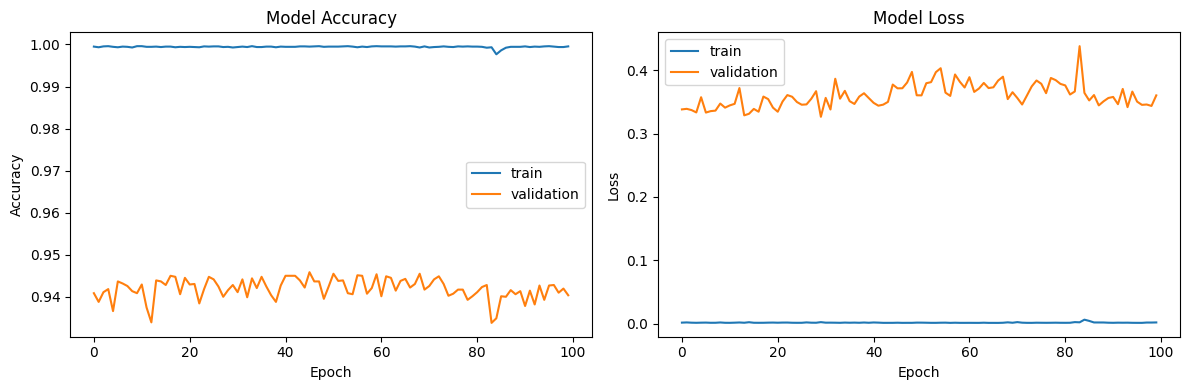

In [ ]:
import os
import pickle
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Train model
history = model5.fit(
    x_train,
    y_train,
    epochs=200,
    batch_size=256,
    callbacks=callbacks_list,
    validation_data=(x_cv, y_cv)
)

# Create directories
save_dir = '/content/pretrained_model'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save model
model5.save(os.path.join(save_dir, 'final_model.h5'))

# Save history
history_path = os.path.join(save_dir, 'history.pckl')
with open(history_path, 'wb') as f:
    pickle.dump(history.history, f)

# Later, to load and visualize:
from tensorflow.keras.models import load_model

# Load model
loaded_model = load_model(os.path.join(save_dir, 'final_model.h5'))

# Load history
with open(history_path, 'rb') as f:
    saved_history = pickle.load(f)

# Create visualizations
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.title('Model Accuracy')
plt.plot(saved_history['accuracy'], label='train')
plt.plot(saved_history['val_accuracy'], label='validation')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Plot loss
plt.subplot(1, 2, 2)
plt.title('Model Loss')
plt.plot(saved_history['loss'], label='train')
plt.plot(saved_history['val_loss'], label='validation')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.tight_layout()
plt.savefig('training_curves.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import pickle

#save:
# f = open('/content/pretrained_model/history.pckl', 'wb')
# pickle.dump(history.history, f)
# f.close()

# retrieve:
f = open('/content/pretrained_model/history.pckl', 'rb')
saved_history = pickle.load(f)
f.close()


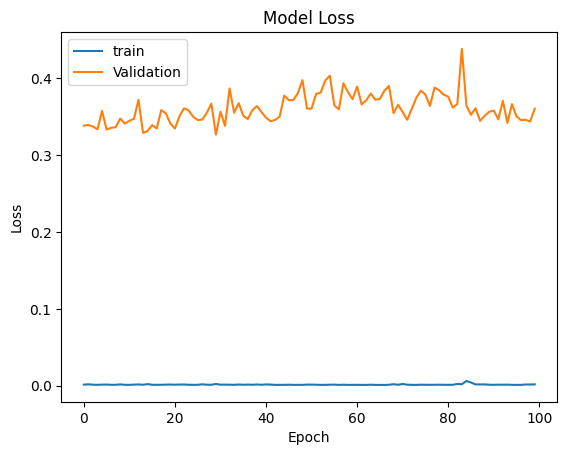

In [ ]:
import matplotlib.pyplot as plt
plt.title('Model Loss')
plt.plot(saved_history['loss'], label='train')
plt.plot(saved_history['val_loss'], label='Validation')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('Loss.png', dpi=300, bbox_inches= 'tight')
plt.show();

<Figure size 630x450 with 0 Axes>

Text(0.5, 1.0, 'Model Accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

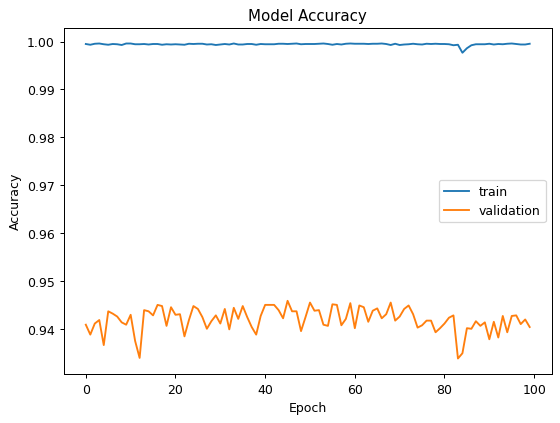

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5), dpi=90)
plt.title('Model Accuracy')
plt.plot(saved_history['accuracy'], label='train')
plt.plot(saved_history['val_accuracy'], label='validation')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig("Accuracy.png", dpi=300, bbox_inches= 'tight')
plt.show();
plt.close()

In [ ]:
#plot history of trained model using the pickle file
import matplotlib.pyplot as plt
w = 7
h = 5
d = 300
plt.figure(figsize=(w, h), dpi=d)
plt.title('Model Loss')
loss = saved_history['loss']
val_loss = saved_history['val_loss']
plt.plot(loss, label='train')
plt.plot(val_loss, label='test')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig("Model_Loss.png")
plt.close()

<Figure size 2100x1500 with 0 Axes>

Text(0.5, 1.0, 'Model Loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

In [ ]:
import os
from tensorflow.keras.models import model_from_json, load_model

# First, create directory if it doesn't exist
save_dir = '/content/pretrained_model'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Method 1: Save architecture and weights separately
# Save model architecture to JSON
model_json = model.to_json()
with open(os.path.join(save_dir, "model_architecture.json"), "w") as json_file:
    json_file.write(model_json)
# Save weights to HDF5
model.save_weights(os.path.join(save_dir, "model_weights.weights.h5"))
print("Saved model to disk")

# Method 2: Save complete model
model.save(os.path.join(save_dir, 'complete_model.weights.h5'))

# Later, to load the model:

# Method 1: Load from JSON + H5
# Load JSON and create model
json_path = os.path.join(save_dir, "model_architecture.json")
weights_path = os.path.join(save_dir, "model_weights.weights.h5")

with open(json_path, 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)
# Load weights into new model
loaded_model.load_weights(weights_path)
# Compile model
loaded_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

# Method 2: Load complete model
complete_model = load_model(os.path.join(save_dir, 'complete_model.weights.h5'))

# Evaluate both loaded models
score1 = loaded_model.evaluate(X_train, Y_train, verbose=0)
score2 = complete_model.evaluate(X_train, Y_train, verbose=0)

print("Method 1 Accuracy: %.2f%%" % (score1[1]*100))
print("Method 2 Accuracy: %.2f%%" % (score2[1]*100))

6757

Saved model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning:

Skipping variable loading for optimizer 'rmsprop', because it has 17 variables whereas the saved optimizer has 32 variables. 



Method 1 Accuracy: 99.41%
Method 2 Accuracy: 99.41%


In [ ]:
#load saved model as keras
#from keras.models import load_model
#keras_saved_model = load_model("/content/pretrained_model/Model_Weights_7_04-26-20/model.json")
#Keras_score = keras_saved_model.evaluate(X_train, Y_train, verbose=0)
#print("%s: %.2f%%" % (keras_saved_model.metrics_names[1], score[1]*100))

# Not mandatory

In [ ]:
# load json and create model
import os
json_file = open('/content/model_01-01-21-updated.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
#load weights into new model
loaded_model.load_weights("/content/pretrained_model/model_weights.weights.h5")
print("Loaded model from disk")
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score=loaded_model.evaluate(X_train, Y_train, verbose=0)

Loaded model from disk


In [ ]:
accr_by_loaded=loaded_model.evaluate(X_test,Y_test)
accr_by_loaded

257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9469 - loss: 0.3542


[0.3622047007083893, 0.9469715356826782]

In [ ]:
# Get predictions
y_pred_probs = model.predict(X_test)  # This gives probability distributions
y_pred = np.argmax(y_pred_probs, axis=1)  # This gives class predictions

# If your Y_test is one-hot encoded, convert it to class indices for comparison
y_test = np.argmax(Y_test, axis=1)

257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [ ]:
#predict using the saved model
#y_pred=model.predict_classes(X_test)#X_test in place of X_train

In [ ]:
#confusion Matrix to LSTM-Classifier
#y_pred=model.predict_classes(X_test) # predict_classes used the round variable values instead of points
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
tests=np.argmax(Y_test, axis=1) # write the Y_test in place of Y_train convert the decimal points to rounded
# we provide the confusion matrix a rounded value otherwise a classification matrix problem arieses
cm=confusion_matrix(y_pred, tests)
print(cm)

pd_cm=pd.DataFrame(cm)

print('Accuracy Score :',accuracy_score(tests, y_pred))
print('Report : ')
print(classification_report(tests, y_pred))
print(pd_cm)



[[1498   27    0    1   38    1]
 [  30 1591    1    1    8    2]
 [   6   19 1469   22    9   45]
 [   4    6    5 1280    4   23]
 [  68    7    0    0  787   26]
 [   6    8    2   27   40 1161]]
Accuracy Score : 0.9469715397713452
Report : 
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1612
           1       0.97      0.96      0.97      1658
           2       0.94      0.99      0.96      1477
           3       0.97      0.96      0.96      1331
           4       0.89      0.89      0.89       886
           5       0.93      0.92      0.93      1258

    accuracy                           0.95      8222
   macro avg       0.94      0.94      0.94      8222
weighted avg       0.95      0.95      0.95      8222

      0     1     2     3    4     5
0  1498    27     0     1   38     1
1    30  1591     1     1    8     2
2     6    19  1469    22    9    45
3     4     6     5  1280    4    23
4    68     7     0     0  

,Precision,Recall,F1-Score,Support
Anti-Religion,0.957188,0.929280,0.943028,1612.0
Anti-State,0.974280,0.959590,0.966879,1658.0
Neutral,0.935669,0.994584,0.964227,1477.0
Racism,0.968230,0.961683,0.964945,1331.0
Sexism,0.886261,0.888262,0.887260,886.0
Offensive,0.933280,0.922893,0.928058,1258.0


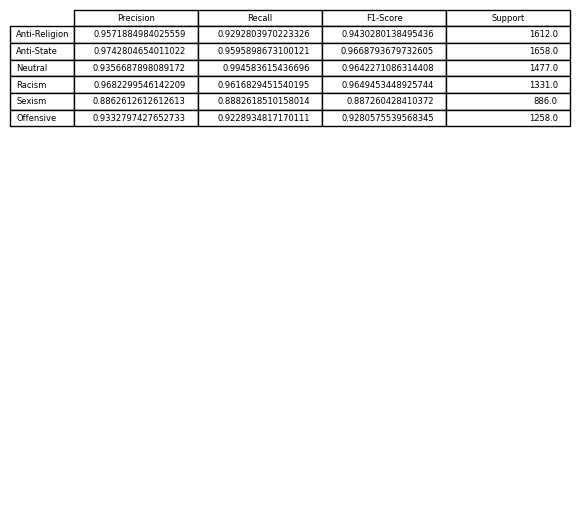

In [ ]:
#printing classification report
report = classification_report(tests, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.index=["Anti-Religion","Anti-State", "Neutral", "Racism", "Sexism", "Offensive","accuracy","macro avg","weighted avg"]
df_report.columns=["Precision", "Recall", "F1-Score", "Support"]
df_report[0:6]
#saving the classification report as a png
from pandas.plotting import table # EDIT: see deprecation warnings below
ax = plt.subplot(frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df_report[0:6],loc='top')  # where df is your data frame

plt.savefig('Classification_report.png', dpi=300,bbox_inches='tight')

<Axes: >

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.72222222222221, 0.5, 'Actual')

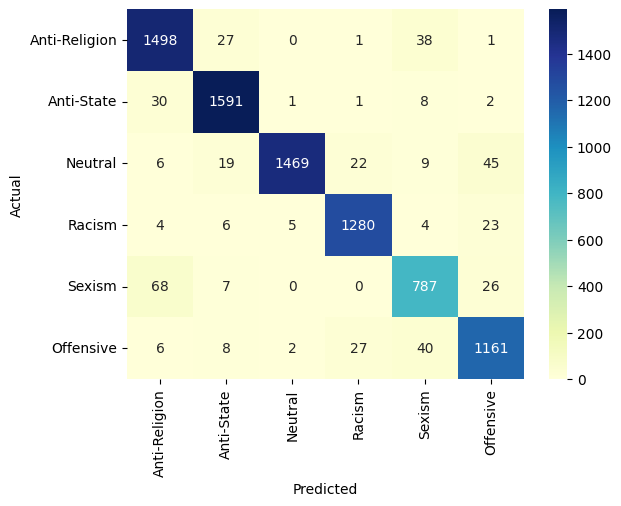

In [ ]:
#confusion matrix by seaborn
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    tests,
        'y_Predicted': y_pred,
        }

# df = pd.DataFrame(data, columns=['y_Actual','y_Predicted', 'Lables'])
# df.head()
# confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'],rownames=['Actual'],colnames=['Predicted'])
# confusion_matrix
# sn.heatmap(confusion_matrix, annot=True,fmt="d", cmap="YlGnBu")
# plt.savefig('save_as_a_png.png', dpi=400)


pd_cm.columns=["Anti-Religion","Anti-State", "Neutral", "Racism", "Sexism", "Offensive"]
pd_cm.index=["Anti-Religion","Anti-State", "Neutral", "Racism", "Sexism", "Offensive"]
sn.heatmap(pd_cm, annot=True,fmt="d", cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.savefig("stacked_lstm(94).png" ,dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
my_categories=["Anti-Religion","Anti-State", "Neutral", "Offensive",  "Racism", "Sexism"]

257/257 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

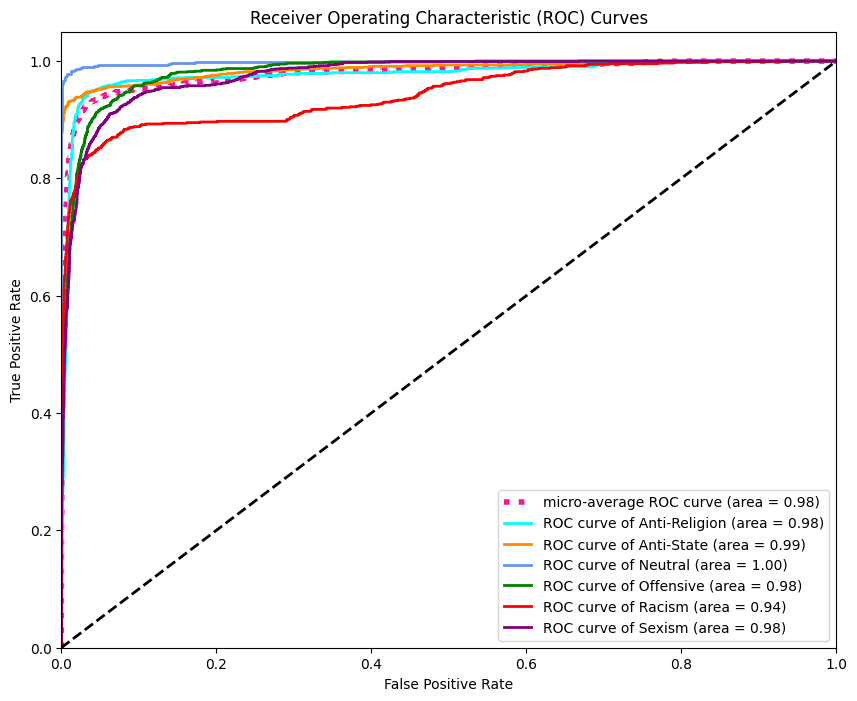

In [ ]:
meu.plot_model_roc_curve(model_2, X_test, Y_test, class_names=my_categories)
plt.savefig('/content/Simple_LSTM_ROC.png', dpi=400, bbox_inches="tight")
plt.show()

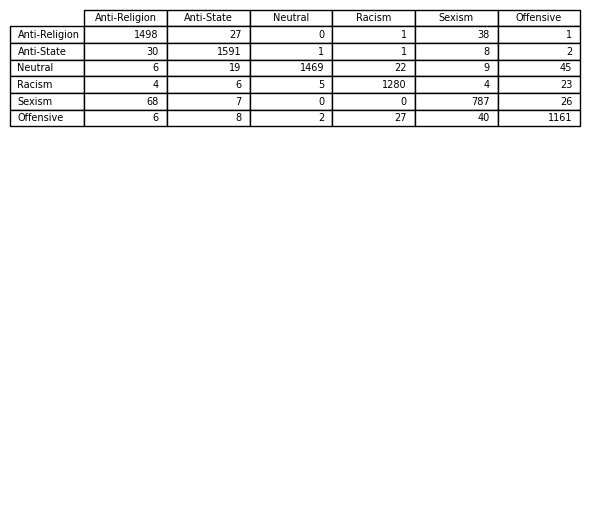

In [ ]:
#saving confusion matrix as a table
from pandas.plotting import table # EDIT: see deprecation warnings below

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, pd_cm,loc='top')  # where df is your data frame
plt.ylabel="Actual"
plt.xlabel="Predicted"
plt.savefig('mytable.png', dpi=300,bbox_inches='tight')





In [ ]:
#Test with a New tweet
new_complaint = ['African niggas']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
pred= loaded_model.predict(padded)
labels = ["Anti-Religion","Anti-State", "Neutral", "Offensive", "Sexism", "Racism" ]
print(pred, labels[np.argmax(pred)])
print(labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[3.3658896e-05 9.0208661e-04 9.9202055e-01 6.1633410e-03 1.1496751e-05
  8.6880662e-04]] Neutral
Neutral


In [ ]:
def predict_class(model, input_data, class_names):
    """
    Make predictions with proper error handling and formatting

    Parameters:
    -----------
    model: keras model
        Trained model to make predictions
    input_data: numpy array
        Input data to make predictions on
    class_names: list
        List of class names

    Returns:
    --------
    predictions: dict
        Dictionary containing predictions and probabilities
    """
    try:
        # Make prediction
        pred_probs = model.predict(input_data)
        pred_classes = np.argmax(pred_probs, axis=1)

        # Format results
        results = []
        for i, pred in enumerate(pred_classes):
            result = {
                'predicted_class': class_names[pred],
                'probabilities': {
                    class_name: float(prob)
                    for class_name, prob in zip(class_names, pred_probs[i])
                }
            }
            results.append(result)

        return results

    except Exception as e:
        print(f"Error making prediction: {str(e)}")
        return None

# Use the function
class_names = ["Anti-Religion","Anti-State", "Neutral", "Offensive", "Racism", "Sexism"]
predictions = predict_class(model, X_test[:5], class_names)

if predictions:
    for i, pred in enumerate(predictions):
        print(f"\nPrediction {i+1}:")
        print(f"Predicted class: {pred['predicted_class']}")
        print("Class probabilities:")
        for class_name, prob in pred['probabilities'].items():
            print(f"{class_name}: {prob*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Prediction 1:
Predicted class: Anti-Religion
Class probabilities:
Anti-Religion: 100.00%
Anti-State: 0.00%
Neutral: 0.00%
Offensive: 0.00%
Racism: 0.00%
Sexism: 0.00%

Prediction 2:
Predicted class: Anti-Religion
Class probabilities:
Anti-Religion: 100.00%
Anti-State: 0.00%
Neutral: 0.00%
Offensive: 0.00%
Racism: 0.00%
Sexism: 0.00%

Prediction 3:
Predicted class: Sexism
Class probabilities:
Anti-Religion: 0.00%
Anti-State: 0.00%
Neutral: 0.00%
Offensive: 0.00%
Racism: 0.00%
Sexism: 100.00%

Prediction 4:
Predicted class: Neutral
Class probabilities:
Anti-Religion: 0.00%
Anti-State: 0.00%
Neutral: 99.99%
Offensive: 0.00%
Racism: 0.00%
Sexism: 0.00%

Prediction 5:
Predicted class: Anti-State
Class probabilities:
Anti-Religion: 0.00%
Anti-State: 100.00%
Neutral: 0.00%
Offensive: 0.00%
Racism: 0.00%
Sexism: 0.00%


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import pandas as pd
import community
from networkx.algorithms.community import girvan_newman

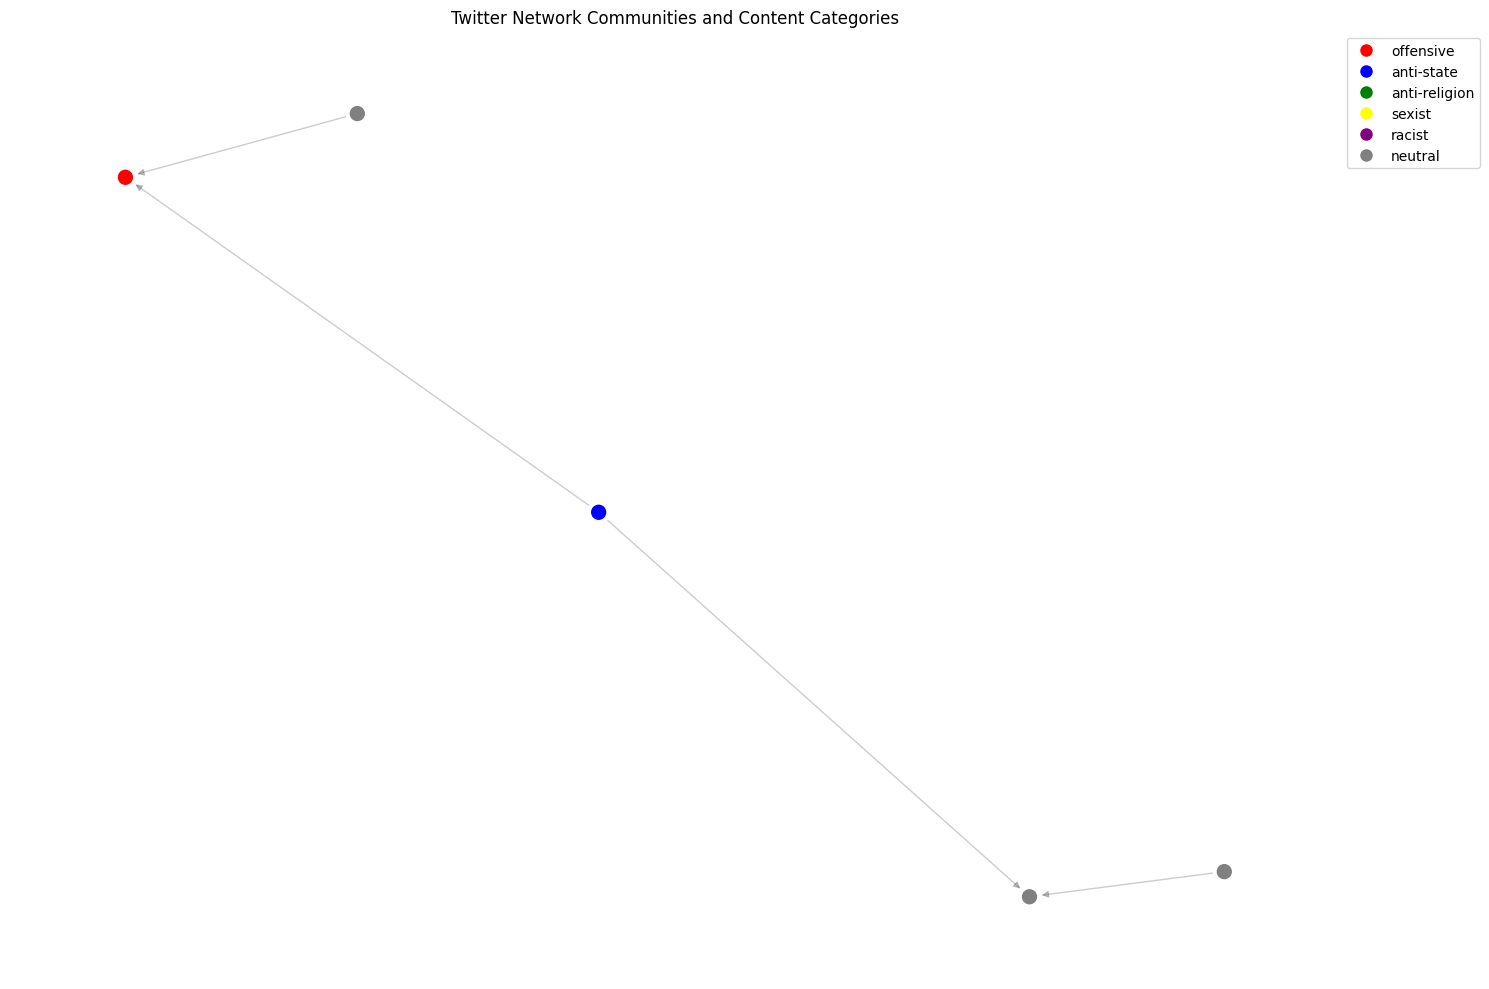

In [ ]:
def create_twitter_network(followers_data):
    """
    Create a directed network from Twitter followers data

    Parameters:
    followers_data: dict
        Dictionary with user IDs as keys and list of follower IDs as values
    """
    G = nx.DiGraph()
    for user, followers in followers_data.items():
        for follower in followers:
            G.add_edge(follower, user)
    return G

def get_communities_with_content(G, user_content_categories):
    """
    Detect communities and analyze content patterns within them

    Parameters:
    G: networkx.DiGraph
        The Twitter follower network
    user_content_categories: dict
        Dictionary mapping user IDs to their content categories
    """
    # Get communities using Girvan-Newman
    communities_generator = girvan_newman(G.to_undirected())
    communities = next(communities_generator)

    # Analyze content patterns in each community
    community_patterns = []
    for i, community in enumerate(communities):
        # Get content categories for users in this community
        categories = [user_content_categories.get(user, 'unknown')
                     for user in community]

        # Count category frequencies
        category_counts = pd.Series(categories).value_counts()

        # Calculate betweenness centrality for community members
        subgraph = G.subgraph(community)
        centrality = nx.betweenness_centrality(subgraph)

        # Find most influential users (highest betweenness centrality)
        influential_users = sorted(centrality.items(),
                                 key=lambda x: x[1],
                                 reverse=True)[:5]

        community_patterns.append({
            'community_id': i,
            'size': len(community),
            'category_distribution': category_counts.to_dict(),
            'influential_users': influential_users
        })

    return communities, community_patterns

def visualize_communities(G, communities, user_content_categories):
    """
    Visualize the network with communities and content categories
    """
    # Create color map for categories
    category_colors = {
        'offensive': 'red',
        'anti-state': 'blue',
        'anti-religion': 'green',
        'sexist': 'yellow',
        'racist': 'purple',
        'neutral': 'gray'
    }

    # Set up the plot
    plt.figure(figsize=(15, 10))

    # Convert communities to a dictionary mapping node to community number
    community_map = {}
    for i, community in enumerate(communities):
        for node in community:
            community_map[node] = i

    # Define node colors based on content category
    node_colors = [category_colors.get(user_content_categories.get(node, 'unknown'), 'gray')
                  for node in G.nodes()]

    # Draw the network
    pos = nx.spring_layout(G, k=1/np.sqrt(len(G.nodes())), iterations=50)
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=100)
    nx.draw_networkx_edges(G, pos, alpha=0.2)

    # Add legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                 markerfacecolor=color, label=cat, markersize=10)
                      for cat, color in category_colors.items()]
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

    plt.title('Twitter Network Communities and Content Categories')
    plt.axis('off')
    plt.tight_layout()
    return plt

def analyze_hate_spread(G, communities, user_content_categories):
    """
    Analyze how hate content spreads within and between communities
    """
    hate_spread_patterns = []

    for i, community in enumerate(communities):
        # Get users who post hate content in this community
        hate_users = [user for user in community
                     if user_content_categories.get(user, 'neutral') != 'neutral']

        # Analyze connections between hate content posters
        hate_subgraph = G.subgraph(hate_users)

        # Calculate density of hate connections
        density = nx.density(hate_subgraph) if hate_users else 0

        # Find influential hate content posters
        centrality = nx.betweenness_centrality(hate_subgraph) if hate_users else {}
        influential_hate_users = sorted(centrality.items(),
                                      key=lambda x: x[1],
                                      reverse=True)[:3]

        hate_spread_patterns.append({
            'community_id': i,
            'hate_user_count': len(hate_users),
            'hate_connection_density': density,
            'influential_hate_users': influential_hate_users
        })

    return hate_spread_patterns

def main(followers_data, user_content_categories):
    """
    Main function to perform community detection and analysis
    """
    # Create network
    G = create_twitter_network(followers_data)

    # Detect communities and analyze patterns
    communities, community_patterns = get_communities_with_content(G, user_content_categories)

    # Analyze hate content spread
    hate_spread_patterns = analyze_hate_spread(G, communities, user_content_categories)

    # Visualize results
    visualize_communities(G, communities, user_content_categories)

    return {
        'communities': communities,
        'community_patterns': community_patterns,
        'hate_spread_patterns': hate_spread_patterns
    }

# Example usage:
if __name__ == "__main__":
    # Sample data structure (you would replace this with your actual data)
    followers_data = {
        'user1': ['follower1', 'follower2'],
        'user2': ['follower3', 'follower1'],
        # ... more user-follower relationships
    }

    user_content_categories = {
        'user1': 'offensive',
        'user2': 'neutral',
        'follower1': 'anti-state',
        # ... more user categories
    }

    results = main(followers_data, user_content_categories)
    plt.show()

In [ ]:
df=pd.read_excel(r'/content/drive/MyDrive/Manideep/Multiclass hate detection Dataset.xlsx')

In [ ]:
offensive_df = df[df['Label'] == 'Offensive']  # Assuming 3 is the offensive class

In [ ]:
offensive_df.count()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', min_df=2)
tfidf_matrix = vectorizer.fit_transform(offensive_df['Text'])

In [ ]:
similarity_matrix = cosine_similarity(tfidf_matrix)

In [ ]:
similarity_matrix

In [ ]:
G = nx.Graph()

In [ ]:
def create_offensive_network_from_df(df):
    """
    Create network from dataframe containing Text and Label columns,
    focusing on offensive content
    """
    # Create directed graph
    G = nx.Graph()

    # Get offensive content texts
    offensive_df = df[df['Label'] == 'Offensive']  # Assuming 3 is the offensive class

    # Create edges based on text similarity
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.metrics.pairwise import cosine_similarity


    # Vectorize the texts
    vectorizer = TfidfVectorizer(stop_words='english', min_df=2)
    tfidf_matrix = vectorizer.fit_transform(offensive_df['Text'])

    # Calculate similarity matrix
    similarity_matrix = cosine_similarity(tfidf_matrix)

    # Add edges between similar texts (threshold = 0.2)
    for i in range(len(similarity_matrix)):
        for j in range(i+1, len(similarity_matrix)):
            if similarity_matrix[i][j] > 0.2:  # Similarity threshold
                G.add_edge(i, j)

    return G

In [ ]:
def visualize_offensive_community(G, df):
    """
    Visualize the offensive content community
    """
    plt.figure(figsize=(15, 10))

    # Calculate node properties
    degree_cent = nx.degree_centrality(G)
    betweenness_cent = nx.betweenness_centrality(G)

    # Node sizes based on degree centrality
    node_sizes = [v * 5000 for v in degree_cent.values()]

    # Node colors based on betweenness centrality
    node_colors = list(betweenness_cent.values())

    # Position nodes using force-directed layout
    pos = nx.spring_layout(G, k=1/np.sqrt(len(G.nodes())), iterations=50)

    # Draw the network
    nodes = nx.draw_networkx_nodes(G, pos,
                                 node_size=node_sizes,
                                 node_color=node_colors,
                                 cmap=plt.cm.Reds,
                                 alpha=0.7)

    edges = nx.draw_networkx_edges(G, pos,
                                 alpha=0.2,
                                 edge_color='gray')

    # Add colorbar
    plt.colorbar(nodes, label='Betweenness Centrality')

    # Add title and labels
    plt.title('Offensive Content Community Network\n'
             'Node size: Degree Centrality, Color: Betweenness Centrality',
             pad=20)

    # Add network metrics
    metrics_text = (
        f"Network Metrics:\n"
        f"Number of nodes: {G.number_of_nodes()}\n"
        f"Number of edges: {G.number_of_edges()}\n"
        f"Network density: {nx.density(G):.3f}\n"
        f"Average clustering: {nx.average_clustering(G):.3f}\n"
        f"Connected components: {nx.number_connected_components(G)}"
    )

    plt.text(1.1, 0.5, metrics_text,
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))

    plt.axis('off')
    plt.tight_layout()

    return plt


In [ ]:
def analyze_offensive_content(df, G):
    """
    Analyze the offensive content community
    """
    # Get offensive content
    offensive_df = df[df['Label'] == 3]

    # Calculate centrality metrics
    degree_cent = nx.degree_centrality(G)
    betweenness_cent = nx.betweenness_centrality(G)

    # Find most influential nodes
    top_nodes = sorted(betweenness_cent.items(), key=lambda x: x[1], reverse=True)[:5]

    # Get example texts for top nodes
    influential_texts = []
    for node, centrality in top_nodes:
        text = offensive_df.iloc[node]['Text']
        influential_texts.append({
            'node': node,
            'centrality': centrality,
            'text': text
        })

    return influential_texts


In [ ]:
def main(df):
    """
    Main function to analyze and visualize offensive content community
    """
    # Create network
    G = create_offensive_network_from_df(df)

    # Get largest connected component
    largest_cc = max(nx.connected_components(G), key=len)
    G_main = G.subgraph(largest_cc).copy()

    # Visualize network
    plt = visualize_offensive_community(G_main, df)

    # Analyze content
    influential_texts = analyze_offensive_content(df, G_main)

    # Print analysis
    print("\nOffensive Content Community Analysis:")
    print(f"\nNumber of total nodes: {G.number_of_nodes()}")
    print(f"Number of nodes in largest component: {G_main.number_of_nodes()}")
    print(f"Number of edges in largest component: {G_main.number_of_edges()}")

    print("\nMost influential content examples:")
    for i, item in enumerate(influential_texts, 1):
        print(f"\n{i}. Node {item['node']} (centrality: {item['centrality']:.3f})")
        print(f"Text: {item['text'][:100]}...")

    plt.show()

    return G_main, influential_texts


In [ ]:
# Usage
if __name__ == "__main__":
    # Load your dataset
    df=pd.read_excel(r'/content/drive/MyDrive/Manideep/Multiclass hate detection Dataset.xlsx')

    # Make sure Label column uses numerical values
    label_map = {
        'offensive': 3,
        'anti-state': 1,
        'anti-religion': 0,
        'neutral': 2,
        'racist': 4,
        'sexist': 5
    }

    if df['Label'].dtype == object:
        df['Label'] = df['Label'].map(label_map)

    # Run analysis
    G_main, influential_texts = main(df)

In [ ]:
df.head()

In [ ]:
offensive_df.head()

In [ ]:
# Print first few rows
print(df.head())

# Check label distribution
print(df['Label'].value_counts())

# Check for any missing values
print(df.isnull().sum())

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

def preprocess_text(text):
    """Clean and preprocess text"""
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove user mentions
        text = re.sub(r'@\w+', '', text)
        # Remove hashtags
        text = re.sub(r'#\w+', '', text)
        # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)
        # Remove extra whitespace
        text = ' '.join(text.split())
        return text
    return ''

def create_offensive_network_from_df(df):
    """Create network from dataframe containing Text and Label columns"""
    # Create directed graph
    G = nx.Graph()

    # Get offensive content texts
    offensive_df = df[df['Label'] == 'Offensive'].copy()  # Assuming 3 is offensive class

    # Preprocess texts
    offensive_df['clean_text'] = offensive_df['Text'].apply(preprocess_text)

    # Remove empty texts
    offensive_df = offensive_df[offensive_df['clean_text'] != '']

    if len(offensive_df) < 2:
        raise ValueError("Not enough offensive content to create network")

    # Vectorize the texts
    vectorizer = TfidfVectorizer(
        stop_words='english',
        min_df=2,
        max_features=5000
    )

    try:
        tfidf_matrix = vectorizer.fit_transform(offensive_df['clean_text'])

        # Calculate similarity matrix
        similarity_matrix = cosine_similarity(tfidf_matrix)

        # Add edges between similar texts (threshold = 0.2)
        for i in range(len(similarity_matrix)):
            for j in range(i+1, len(similarity_matrix)):
                if similarity_matrix[i][j] > 0.2:  # Similarity threshold
                    G.add_edge(i, j)

    except ValueError as e:
        print(f"Error in vectorization: {e}")
        print("Sample texts:")
        print(offensive_df['clean_text'].head())
        raise

    return G, offensive_df

if __name__ == "__main__":
    # Load your dataset
    df = pd.read_excel(r'/content/drive/MyDrive/Manideep/Multiclass hate detection Dataset.xlsx')

    # Print initial information
    print("Dataset shape:", df.shape)
    print("\nLabel distribution:")
    print(df['Label'].value_counts())

    # Ensure Text column is string type
    df['Text'] = df['Text'].astype(str)

    # Convert labels if needed
    label_map = {
        'offensive': 3,
        'anti-state': 1,
        'anti-religion': 0,
        'neutral': 2,
        'racist': 4,
        'sexist': 5
    }

    if df['Label'].dtype == object:
        df['Label'] = df['Label'].map(label_map)

    # Print sample of offensive texts
    print("\nSample offensive texts:")
    offensive_samples = df[df['Label'] == 3]['Text'].head()
    for i, text in enumerate(offensive_samples, 1):
        print(f"{i}. {text[:100]}...")

    try:
        # Create network
        G, offensive_df = create_offensive_network_from_df(df)

        # Get largest connected component
        if G.number_of_nodes() > 0:
            largest_cc = max(nx.connected_components(G), key=len)
            G_main = G.subgraph(largest_cc).copy()

            # Calculate node properties
            degree_cent = nx.degree_centrality(G_main)
            betweenness_cent = nx.betweenness_centrality(G_main)

            # Visualize
            plt.figure(figsize=(15, 10))

            # Node sizes based on degree centrality
            node_sizes = [v * 5000 for v in degree_cent.values()]

            # Node colors based on betweenness centrality
            node_colors = list(betweenness_cent.values())

            # Position nodes
            pos = nx.spring_layout(G_main)

            # Draw network
            nodes = nx.draw_networkx_nodes(G_main, pos,
                                         node_size=node_sizes,
                                         node_color=node_colors,
                                         cmap=plt.cm.Reds,
                                         alpha=0.7)

            edges = nx.draw_networkx_edges(G_main, pos,
                                         alpha=0.2,
                                         edge_color='gray')

            plt.colorbar(nodes, label='Betweenness Centrality')

            # Add title
            plt.title('Offensive Content Community Network\n' +
                     f'Nodes: {G_main.number_of_nodes()}, Edges: {G_main.number_of_edges()}')

            plt.axis('off')
            plt.tight_layout()

            # Save and show plot
            plt.savefig('offensive_community_network.png', dpi=300, bbox_inches='tight')
            plt.show()

            # Print network statistics
            print("\nNetwork Statistics:")
            print(f"Total nodes: {G.number_of_nodes()}")
            print(f"Total edges: {G.number_of_edges()}")
            print(f"Network density: {nx.density(G_main):.3f}")
            print(f"Average clustering coefficient: {nx.average_clustering(G_main):.3f}")

        else:
            print("No connections found in the network")

    except Exception as e:
        print(f"Error in network creation: {e}")
        print("\nDataset statistics:")
        print(df.describe())
        print("\nUnique labels:", df['Label'].unique())

In [ ]:
offensive_df.tail()

In [ ]:
import networkx as nx
from community import community_louvain
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def detect_hate_communities(user_connections, user_content_categories):
    """
    Detect communities in Twitter network using Louvain method

    Parameters:
    user_connections: dict of lists
        Dictionary where keys are users and values are lists of their followers/following
    user_content_categories: dict
        Dictionary where keys are users and values are their predicted hate content categories

    Returns:
    communities: dict
        Dictionary of communities with their members and statistics
    G: networkx.Graph
        The network graph with community assignments
    """
    # Create network graph
    G = nx.Graph()

    # Add edges from user connections
    for user, connections in user_connections.items():
        for connection in connections:
            G.add_edge(user, connection)

    # Add node attributes for hate categories
    nx.set_node_attributes(G, user_content_categories, 'category')

    # Detect communities using Louvain method
    communities = community_louvain.best_partition(G)

    # Convert communities to more useful format
    community_stats = {}
    for node, community_id in communities.items():
        if community_id not in community_stats:
            community_stats[community_id] = {
                'members': [],
                'categories': {},
                'size': 0,
                'density': 0,
                'influential_members': []
            }
        community_stats[community_id]['members'].append(node)

        # Track hate categories in community
        category = user_content_categories.get(node)
        if category:
            if category not in community_stats[community_id]['categories']:
                community_stats[community_id]['categories'][category] = 0
            community_stats[community_id]['categories'][category] += 1

    # Calculate additional metrics for each community
    for community_id in community_stats:
        members = community_stats[community_id]['members']
        subgraph = G.subgraph(members)

        # Calculate density
        community_stats[community_id]['density'] = nx.density(subgraph)
        community_stats[community_id]['size'] = len(members)

        # Find influential members using degree centrality
        centrality = nx.degree_centrality(subgraph)
        influential = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:5]
        community_stats[community_id]['influential_members'] = influential

    return community_stats, G

def visualize_communities(G, communities, user_content_categories):
    """
    Visualize the communities with nodes colored by hate category

    Parameters:
    G: networkx.Graph
        The network graph
    communities: dict
        Community assignments for each node
    user_content_categories: dict
        Hate categories for each user
    """
    # Set up colors for different hate categories
    category_colors = {
        'offensive': 'red',
        'anti-state': 'blue',
        'anti-religion': 'green',
        'sexist': 'purple',
        'racist': 'orange',
        'neutral': 'gray'
    }

    # Create position layout
    pos = nx.spring_layout(G)

    plt.figure(figsize=(12, 8))

    # Draw nodes colored by hate category
    for category, color in category_colors.items():
        node_list = [node for node in G.nodes()
                    if user_content_categories.get(node) == category]
        nx.draw_networkx_nodes(G, pos,
                             nodelist=node_list,
                             node_color=color,
                             node_size=100,
                             alpha=0.6,
                             label=category)

    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.2)

    plt.title("Twitter Hate Speech Communities")
    plt.legend()
    plt.axis('off')

    return plt

def analyze_community_overlap(community_stats):
    """
    Analyze how different hate categories overlap in communities

    Parameters:
    community_stats: dict
        Statistics about each community

    Returns:
    DataFrame showing category overlap statistics
    """
    overlap_data = []

    for comm_id, stats in community_stats.items():
        categories = stats['categories']
        if len(categories) > 1:  # Only look at mixed communities
            total_members = sum(categories.values())

            for cat1 in categories:
                for cat2 in categories:
                    if cat1 < cat2:  # Avoid duplicate pairs
                        overlap_data.append({
                            'community_id': comm_id,
                            'category1': cat1,
                            'category2': cat2,
                            'overlap_percentage': (categories[cat1] + categories[cat2]) / total_members * 100,
                            'community_size': stats['size']
                        })

    return pd.DataFrame(overlap_data)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def visualize_offensive_communities(user_connections, user_content_categories):
    """
    Visualize communities focusing on offensive content sharing

    Parameters:
    user_connections: dict of lists
        Dictionary where keys are users and values are lists of their followers/following
    user_content_categories: dict
        Dictionary where keys are users and values are their predicted categories
    """
    # Create network graph
    G = nx.Graph()

    # Add edges from user connections
    for user, connections in user_connections.items():
        for connection in connections:
            # Only add edge if at least one user shares offensive content
            if (user_content_categories.get(user) == 'offensive' or
                user_content_categories.get(connection) == 'offensive'):
                G.add_edge(user, connection)

    # Calculate node sizes based on degree centrality (influence)
    centrality = nx.degree_centrality(G)
    node_sizes = [centrality[node] * 3000 for node in G.nodes()]

    # Set up node colors
    node_colors = []
    for node in G.nodes():
        if user_content_categories.get(node) == 'offensive':
            node_colors.append('red')  # Offensive content sharers
        else:
            node_colors.append('black')  # Connected users

    # Calculate node positions using force-directed layout
    pos = nx.spring_layout(G, k=1/np.sqrt(len(G.nodes())), iterations=50)

    # Create visualization
    plt.figure(figsize=(15, 10))

    # Draw the network
    nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='gray')

    # Draw nodes
    nx.draw_networkx_nodes(G, pos,
                          node_size=node_sizes,
                          node_color=node_colors,
                          alpha=0.7)

    # Add labels for influential nodes (top 10 by degree centrality)
    top_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    labels = {node: node for node, _ in top_nodes}
    nx.draw_networkx_labels(G, pos, labels, font_size=8)

    # Add legend
    plt.plot([], [], 'o', color='red', label='Offensive content sharers', markersize=10)
    plt.plot([], [], 'o', color='lightgray', label='Connected users', markersize=10)
    plt.legend()

    plt.title("Offensive Content Sharing Communities in Twitter Network")
    plt.axis('off')

    return G, centrality

def analyze_offensive_communities(G, user_content_categories, centrality):
    """
    Analyze the structure of offensive content sharing communities

    Returns:
    dict containing analysis metrics
    """
    offensive_users = [node for node in G.nodes()
                      if user_content_categories.get(node) == 'offensive']

    # Calculate metrics
    metrics = {
        'total_users': len(G.nodes()),
        'offensive_users': len(offensive_users),
        'total_connections': len(G.edges()),
        'density': nx.density(G),
        'avg_clustering': nx.average_clustering(G),
    }

    # Find most influential offensive users
    offensive_influence = {node: cent for node, cent in centrality.items()
                         if user_content_categories.get(node) == 'offensive'}
    top_influential = sorted(offensive_influence.items(),
                           key=lambda x: x[1],
                           reverse=True)[:5]

    metrics['top_influential_users'] = top_influential

    # Calculate connectivity patterns
    offensive_connections = defaultdict(int)
    for edge in G.edges():
        user1, user2 = edge
        if (user_content_categories.get(user1) == 'offensive' and
            user_content_categories.get(user2) == 'offensive'):
            offensive_connections['offensive-offensive'] += 1
        elif (user_content_categories.get(user1) == 'offensive' or
              user_content_categories.get(user2) == 'offensive'):
            offensive_connections['offensive-other'] += 1

    metrics['connection_patterns'] = dict(offensive_connections)

    return metrics

def print_analysis(metrics):
    """
    Print formatted analysis of the offensive content communities
    """
    print("\nOffensive Content Community Analysis")
    print("=" * 40)
    print(f"Total users in network: {metrics['total_users']}")
    print(f"Users sharing offensive content: {metrics['offensive_users']} "
          f"({metrics['offensive_users']/metrics['total_users']*100:.1f}%)")
    print(f"Total connections: {metrics['total_connections']}")
    print(f"Network density: {metrics['density']:.3f}")
    print(f"Average clustering coefficient: {metrics['avg_clustering']:.3f}")

    print("\nTop Influential Users Sharing Offensive Content:")
    for user, influence in metrics['top_influential_users']:
        print(f"- {user}: Influence score = {influence:.3f}")

    print("\nConnection Patterns:")
    patterns = metrics['connection_patterns']
    total_connections = sum(patterns.values())
    for pattern, count in patterns.items():
        print(f"- {pattern}: {count} connections ({count/total_connections*100:.1f}%)")

def main_offensive_analysis(user_connections, user_content_categories):
    """
    Main function to run the offensive content community analysis
    """
    # Create visualization and get graph data
    G, centrality = visualize_offensive_communities(user_connections, user_content_categories)

    # Run analysis
    metrics = analyze_offensive_communities(G, user_content_categories, centrality)

    # Print results
    print_analysis(metrics)

    return G, metrics

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import pandas as pd

# First let's create example data based on LSTM predictions
def create_example_predictions(model, tokenizer, X_test, Y_test, max_sequence_length):
    """
    Get predictions from the LSTM model and convert to user categories
    """
    # Get predictions
    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1)

    # Create a mapping of numeric labels to categories
    label_mapping = {
        0: "anti-religion",
        1: "anti-state",
        2: "neutral",
        3: "offensive",
        4: "racist",
        5: "sexist"
    }

    # Convert numeric predictions to category labels
    predicted_categories = [label_mapping[pred] for pred in predicted_classes]

    return predicted_categories

def create_user_network(predicted_categories, n_connections=3):
    """
    Create a sample network of users and their connections based on predictions
    """
    user_connections = {}
    user_categories = {}

    # Create users with their categories
    for i, category in enumerate(predicted_categories[:100]):  # Use first 100 predictions
        user_id = f'user_{i}'
        user_categories[user_id] = category

        # Create random connections, with higher probability of connecting to users with same category
        connections = []
        for _ in range(n_connections):
            if np.random.random() < 0.7:  # 70% chance to connect to same category
                same_category_users = [f'user_{j}' for j, cat in enumerate(predicted_categories[:100])
                                    if cat == category and f'user_{j}' != user_id]
                if same_category_users:
                    connections.append(np.random.choice(same_category_users))
            else:
                other_user = f'user_{np.random.randint(0, 100)}'
                if other_user != user_id:
                    connections.append(other_user)

        user_connections[user_id] = list(set(connections))  # Remove duplicates

    return user_connections, user_categories

def plot_offensive_communities(user_connections, user_categories):
    """
    Create visualization of offensive content communities
    """
    # Create network graph
    G = nx.Graph()

    # Add edges from user connections
    for user, connections in user_connections.items():
        for connection in connections:
            G.add_edge(user, connection)

    # Calculate node metrics
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)

    # Combine centrality measures
    node_importance = {node: (degree_centrality[node] + betweenness_centrality[node])/2
                      for node in G.nodes()}

    # Set up node colors and sizes
    node_colors = []
    node_sizes = []
    labels = {}

    for node in G.nodes():
        # Color nodes based on category
        if user_categories.get(node) == 'offensive':
            node_colors.append('red')
            node_sizes.append(2000 * node_importance[node])
            if node_importance[node] > np.mean(list(node_importance.values())):
                labels[node] = node  # Only label influential nodes
        else:
            node_colors.append('lightgray')
            node_sizes.append(1000 * node_importance[node])

    # Create visualization
    plt.figure(figsize=(20, 15))

    # Use force-directed layout
    pos = nx.spring_layout(G, k=1/np.sqrt(len(G.nodes())), iterations=50)

    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='gray')

    # Draw nodes
    nx.draw_networkx_nodes(G, pos,
                          node_size=node_sizes,
                          node_color=node_colors,
                          alpha=0.7)

    # Add labels for influential nodes
    nx.draw_networkx_labels(G, pos, labels, font_size=8)

    # Add legend
    plt.plot([], [], 'o', color='red', label='Offensive content sharers', markersize=15)
    plt.plot([], [], 'o', color='lightgray', label='Other users', markersize=15)

    plt.title("Offensive Content Sharing Communities", fontsize=16, pad=20)
    plt.legend(fontsize=12)
    plt.axis('off')

    return G, pos

# Main execution function
def visualize_offensive_network(model, tokenizer, X_test, Y_test, max_sequence_length):
    """
    Main function to create and visualize the offensive content network
    """
    # Get predictions and create categories
    predicted_categories = create_example_predictions(model, tokenizer, X_test, Y_test, max_sequence_length)

    # Create network
    user_connections, user_categories = create_user_network(predicted_categories)

    # Plot network
    G, pos = plot_offensive_communities(user_connections, user_categories)

    # Print some statistics
    offensive_users = sum(1 for cat in user_categories.values() if cat == 'offensive')
    total_users = len(user_categories)

    print("\nNetwork Statistics:")
    print(f"Total users: {total_users}")
    print(f"Users sharing offensive content: {offensive_users} ({offensive_users/total_users*100:.1f}%)")
    print(f"Total connections: {len(G.edges())}")
    print(f"Network density: {nx.density(G):.3f}")

    plt.savefig('offensive_communities_visualization.png', dpi=300, bbox_inches='tight')
    plt.close()

    return G, user_connections, user_categories

In [ ]:
# Create visualization
G, user_connections, user_categories = visualize_offensive_network(
    model=model,
    tokenizer=tokenizer,
    X_test=X_test,
    Y_test=Y_test,
    max_sequence_length=MAX_SEQUENCE_LENGTH
)

257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Network Statistics:
Total users: 100
Users sharing offensive content: 18 (18.0%)
Total connections: 269
Network density: 0.054


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import pandas as pd
import os

def create_example_predictions(model, tokenizer, X_test, Y_test, max_sequence_length):
    """Get predictions from the LSTM model and convert to user categories"""
    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1)

    label_mapping = {
        0: "anti-religion",
        1: "anti-state",
        2: "neutral",
        3: "offensive",
        4: "racist",
        5: "sexist"
    }

    predicted_categories = [label_mapping[pred] for pred in predicted_classes]
    return predicted_categories

def create_user_network(predicted_categories, n_connections=3):
    """Create a sample network of users based on predictions"""
    user_connections = {}
    user_categories = {}

    # Create users with their categories
    for i, category in enumerate(predicted_categories[:100]):
        user_id = f'user_{i}'
        user_categories[user_id] = category

        connections = []
        for _ in range(n_connections):
            if np.random.random() < 0.7:
                same_category_users = [f'user_{j}' for j, cat in enumerate(predicted_categories[:100])
                                    if cat == category and f'user_{j}' != user_id]
                if same_category_users:
                    connections.append(np.random.choice(same_category_users))
            else:
                other_user = f'user_{np.random.randint(0, 100)}'
                if other_user != user_id:
                    connections.append(other_user)

        user_connections[user_id] = list(set(connections))

    return user_connections, user_categories

def plot_and_save_communities(model, tokenizer, X_test, Y_test, max_sequence_length, save_path='community_plots'):
    """Plot and save community visualizations"""
    # Create save directory if it doesn't exist
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    # Get predictions and create network
    predicted_categories = create_example_predictions(model, tokenizer, X_test, Y_test, max_sequence_length)
    user_connections, user_categories = create_user_network(predicted_categories)

    # Create network graph
    G = nx.Graph()

    # Add edges
    for user, connections in user_connections.items():
        for connection in connections:
            G.add_edge(user, connection)

    # Calculate centrality metrics
    degree_cent = nx.degree_centrality(G)
    between_cent = nx.betweenness_centrality(G)

    # Clear any existing plots
    plt.clf()

    # Create main plot
    plt.figure(figsize=(20, 15))

    # Set up node properties
    node_colors = []
    node_sizes = []
    labels = {}

    for node in G.nodes():
        importance = (degree_cent[node] + between_cent[node])/2

        if user_categories.get(node) == 'offensive':
            node_colors.append('#FF4444')  # Bright red
            node_sizes.append(3000 * importance)
            if importance > np.mean(list(degree_cent.values())):
                labels[node] = node
        else:
            node_colors.append('#CCCCCC')  # Light gray
            node_sizes.append(1500 * importance)

    # Create layout
    pos = nx.spring_layout(G, k=1/np.sqrt(len(G.nodes())), iterations=50)

    # Draw network elements
    nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='#666666')
    nx.draw_networkx_nodes(G, pos,
                          node_size=node_sizes,
                          node_color=node_colors,
                          alpha=0.8)
    nx.draw_networkx_labels(G, pos, labels, font_size=10)

    # Add legend and title
    plt.plot([], [], 'o', color='#FF4444', label='Offensive content sharers', markersize=15)
    plt.plot([], [], 'o', color='#CCCCCC', label='Other users', markersize=15)
    plt.title("Twitter Offensive Content Communities", fontsize=16, pad=20)
    plt.legend(fontsize=12, loc='upper right')

    # Remove axes
    plt.axis('off')

    # Save plots with different filenames
    base_filename = os.path.join(save_path, 'offensive_communities')

    # Save as PNG with high DPI
    plt.savefig(f'{base_filename}.png',
                dpi=300,
                bbox_inches='tight',
                pad_inches=0.5,
                facecolor='white')

    # Save as PDF for vector graphics
    plt.savefig(f'{base_filename}.pdf',
                format='pdf',
                bbox_inches='tight',
                pad_inches=0.5)

    # Print statistics
    offensive_users = sum(1 for cat in user_categories.values() if cat == 'offensive')
    total_users = len(user_categories)

    print("\nNetwork Statistics:")
    print(f"Total users: {total_users}")
    print(f"Users sharing offensive content: {offensive_users} ({offensive_users/total_users*100:.1f}%)")
    print(f"Total connections: {len(G.edges())}")
    print(f"Network density: {nx.density(G):.3f}")
    print(f"\nPlots saved in {save_path} directory")

    # Clear the plot to free memory
    plt.close()

    return G, user_connections, user_categories